# **Home Credit Indonesia Score Card Modeling**

--------------------------

## Problems
Home Credit Indonesia is facing several challenges:  
1. Ensuring that customers who can repay their loans (class 0) are not rejected to increase profitability.  
2. Identifying customers who are likely to face repayment issues to minimize loans granted to unqualified customers and reduce potential losses.  

---

## Goals
To address these challenges, a machine learning model will be developed to predict credit scores, helping determine clients capable of repaying loans and those who may encounter payment issues.  

---

## Objectives
1. Identify the main problems to be solved.  
2. Select appropriate machine learning models and evaluation metrics.  
3. Conduct exploratory data analysis (EDA) to understand the dataset characteristics and uncover valuable insights.  
4. Perform data preprocessing, including data cleansing, feature encoding, handling class imbalance, etc.  
5. Build classification models, such as logistic regression, decision tree, or others.  
6. Determine the best model based on evaluation metric results.  
7. Provide business recommendations based on analysis and findings.  

---

## Metric Evaluation
1. Balanced Accuracy: The average recall for class 0 and class 1, ensuring good performance for both classes.  
2. Recall: Measures how well the model identifies all positive cases out of the actual positives in the data.  
3. Precision: Measures the accuracy of the model in predicting the positive class, indicating how many predicted positives are truly positive.  

---

## Tools
1. Python Programming Language  
2. JupyterLab / Jupyter Notebook  

---

# 0. Import Library and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import  balanced_accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns',None)

df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
print('Number of rows :',df_train.shape[0])
print('Number of columns :',df_train.shape[1])

Number of rows : 307511
Number of columns : 122


# 1. Exploratory Data Analysis (EDA)

In [84]:
df_train_eda = df_train.copy()

## Information About Dataset

In [10]:
df_train_eda.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Dataset's Data Type

In [18]:
# Displaying unique data types and their counts
data_types = df_train_eda.dtypes.value_counts()
print("Data types in the DataFrame:")
print(data_types)

Data types in the DataFrame:
float64    65
int64      41
object     16
Name: count, dtype: int64


## Unique Value Per Columns

### Unique Value of Numerical Columns

In [16]:
# Displaying unique values for each column with data type 'float64'
float_columns = df_train_eda.select_dtypes(include=['float64'])

print("Unique values for each column with data type 'float64':")
for column in float_columns.columns:
    print(f"\nColumn: {column}")
    print(float_columns[column].unique())

Unique values for each column with data type 'float64':

Column: AMT_INCOME_TOTAL
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

Column: AMT_CREDIT
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

Column: AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Column: AMT_GOODS_PRICE
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Column: REGION_POPULATION_RELATIVE
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.003069
 0.020246 0.018209 0.009549 0.007274 0.002134 0.010276 0.003813 0.003818
 0.00712  0.0105   0.010147 0.010643 0.008866 0.00702  0.002506 0.005313
 0.006233 0.008474 0.005144 0.011657 0.008625 0.014464 0.004

In [20]:
# Displaying unique values for each column with data type 'int64'
int_columns = df_train_eda.select_dtypes(include=['int64'])

print("Unique values for each column with data type 'int64':")
for column in int_columns.columns:
    print(f"\nColumn: {column}")
    print(int_columns[column].unique())

Unique values for each column with data type 'int64':

Column: SK_ID_CURR
[100002 100003 100004 ... 456253 456254 456255]

Column: TARGET
[1 0]

Column: CNT_CHILDREN
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

Column: DAYS_BIRTH
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]

Column: DAYS_EMPLOYED
[  -637  -1188   -225 ... -12971 -11084  -8694]

Column: DAYS_ID_PUBLISH
[-2120  -291 -2531 ... -6194 -5854 -6211]

Column: FLAG_MOBIL
[1 0]

Column: FLAG_EMP_PHONE
[1 0]

Column: FLAG_WORK_PHONE
[0 1]

Column: FLAG_CONT_MOBILE
[1 0]

Column: FLAG_PHONE
[1 0]

Column: FLAG_EMAIL
[0 1]

Column: REGION_RATING_CLIENT
[2 1 3]

Column: REGION_RATING_CLIENT_W_CITY
[2 1 3]

Column: HOUR_APPR_PROCESS_START
[10 11  9 17 16 14  8 15  7 13  6 12 19  3 18 21  4  5 20 22  1  2 23  0]

Column: REG_REGION_NOT_LIVE_REGION
[0 1]

Column: REG_REGION_NOT_WORK_REGION
[0 1]

Column: LIVE_REGION_NOT_WORK_REGION
[0 1]

Column: REG_CITY_NOT_LIVE_CITY
[0 1]

Column: REG_CITY_NOT_WORK_CITY
[0 1]

Column: LIVE_CIT

### Unique Value of Categorical Columns

In [22]:
# Displaying unique values for each column with data type 'object'
obj_columns = df_train_eda.select_dtypes(include=['object'])

print("Unique values for each column with data type 'object':")
for column in obj_columns.columns:
    print(f"\nColumn: {column}")
    print(obj_columns[column].unique())

Unique values for each column with data type 'object':

Column: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

Column: CODE_GENDER
['M' 'F' 'XNA']

Column: FLAG_OWN_CAR
['N' 'Y']

Column: FLAG_OWN_REALTY
['Y' 'N']

Column: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Column: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Column: NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Column: NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Column: NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Column: OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staf

## Summarical Statistics

In [24]:
# Summarrical statistics for numerical columns (int64 dan float64)
numerical_summary = df_train_eda.select_dtypes(include=['int64', 'float64']).describe()

# Summarical statistics for categorical columns (object)
categorical_summary = df_train_eda.select_dtypes(include=['object']).describe()

In [27]:
numerical_summary

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [29]:
categorical_summary

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

## Boxplot of Numerical Feature

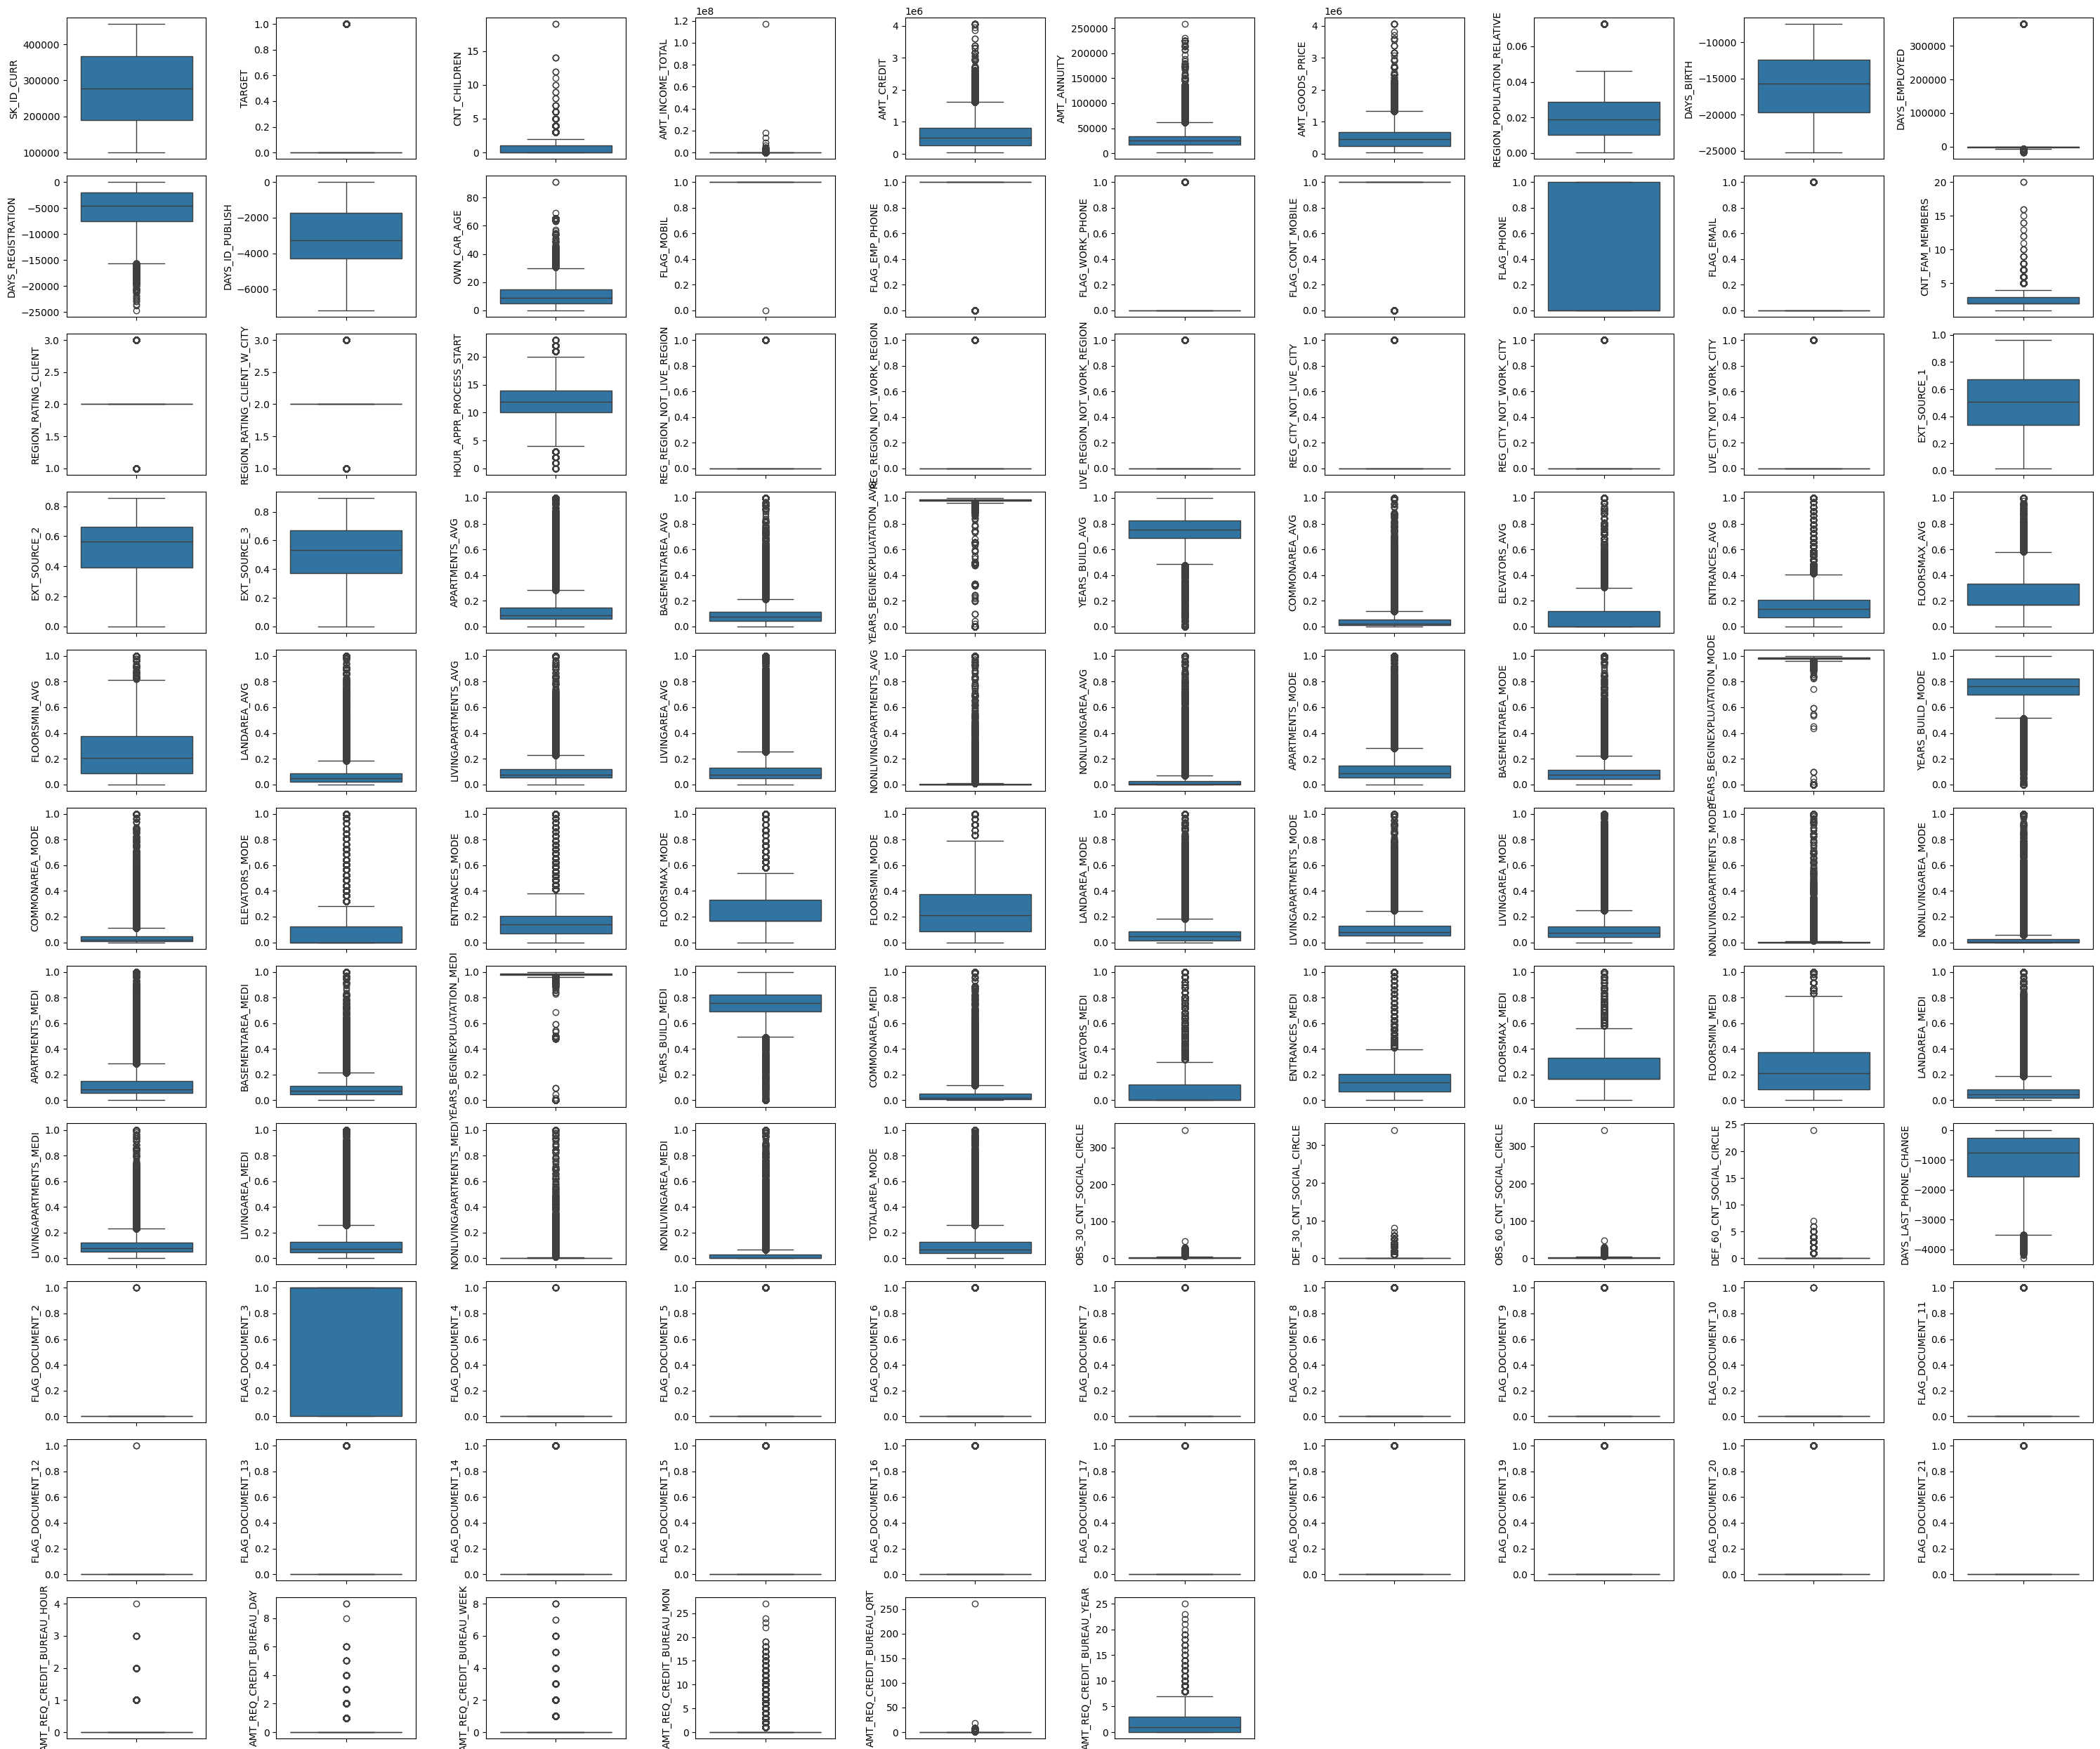

In [48]:
# Selecting columns with data types int64 and float64
nums = df_train_eda.loc[:, (df_train_eda.dtypes == 'int64') | (df_train_eda.dtypes == 'float64')].columns.tolist()

# Plotting using boxplots
plt.figure(figsize=(30, 25))
for i in range(len(nums)):  # Using len(nums) directly
    plt.subplot(11, 10, i + 1)  # Adjusted for the number of columns
    sns.boxplot(y=df_train_eda[nums[i]], orient='v')
    plt.tight_layout()
plt.show()

## Distribution Line of Numerical Feature

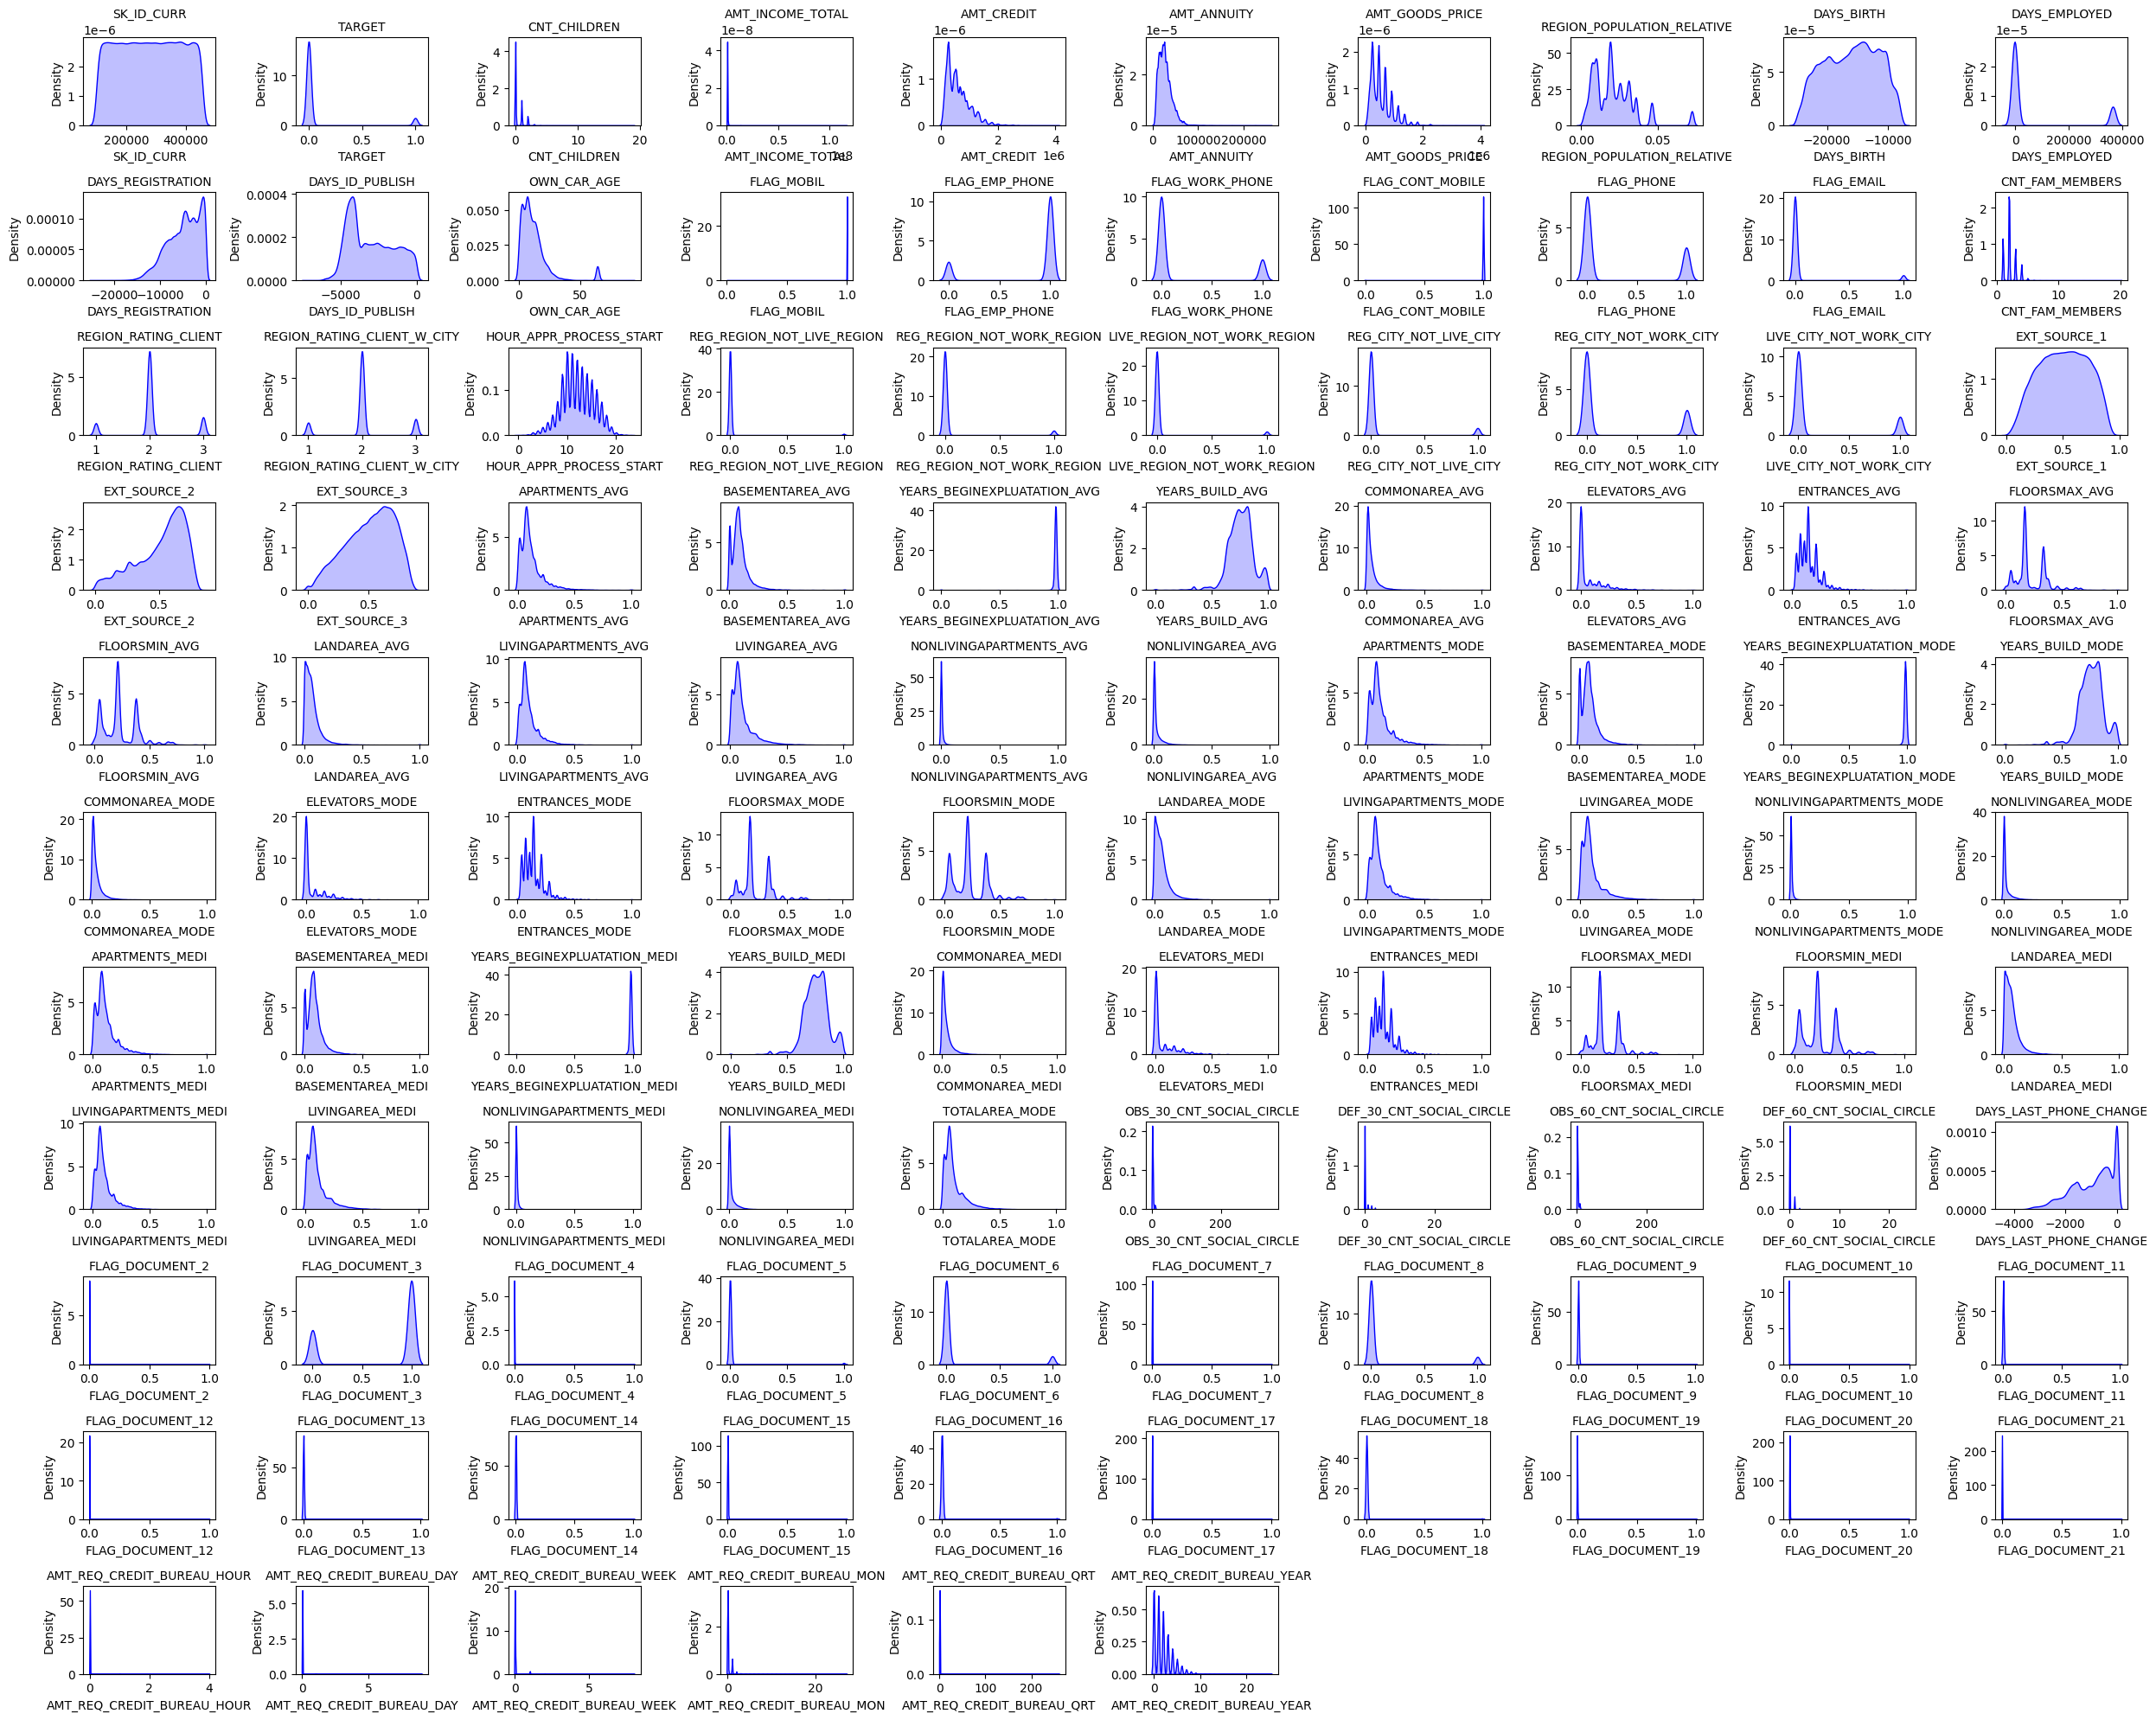

In [44]:
# Selecting numeric columns (int64 and float64)
nums = df_train_eda.loc[:, (df_train_eda.dtypes == 'int64') | (df_train_eda.dtypes == 'float64')].columns.tolist()

# Creating density plots for each numeric column
plt.figure(figsize=(25, 20))
for i in range(len(nums)):  # Using len(nums) directly
    plt.subplot(11, 10, i + 1)  # Grid 11x10 (adjust if the number of columns is different)
    sns.kdeplot(data=df_train_eda[nums[i]], shade=True, color='blue')  # Density curve with shading
    plt.title(nums[i], fontsize=10)  # Title for each column
    plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Bar Plot of Categorical Feature

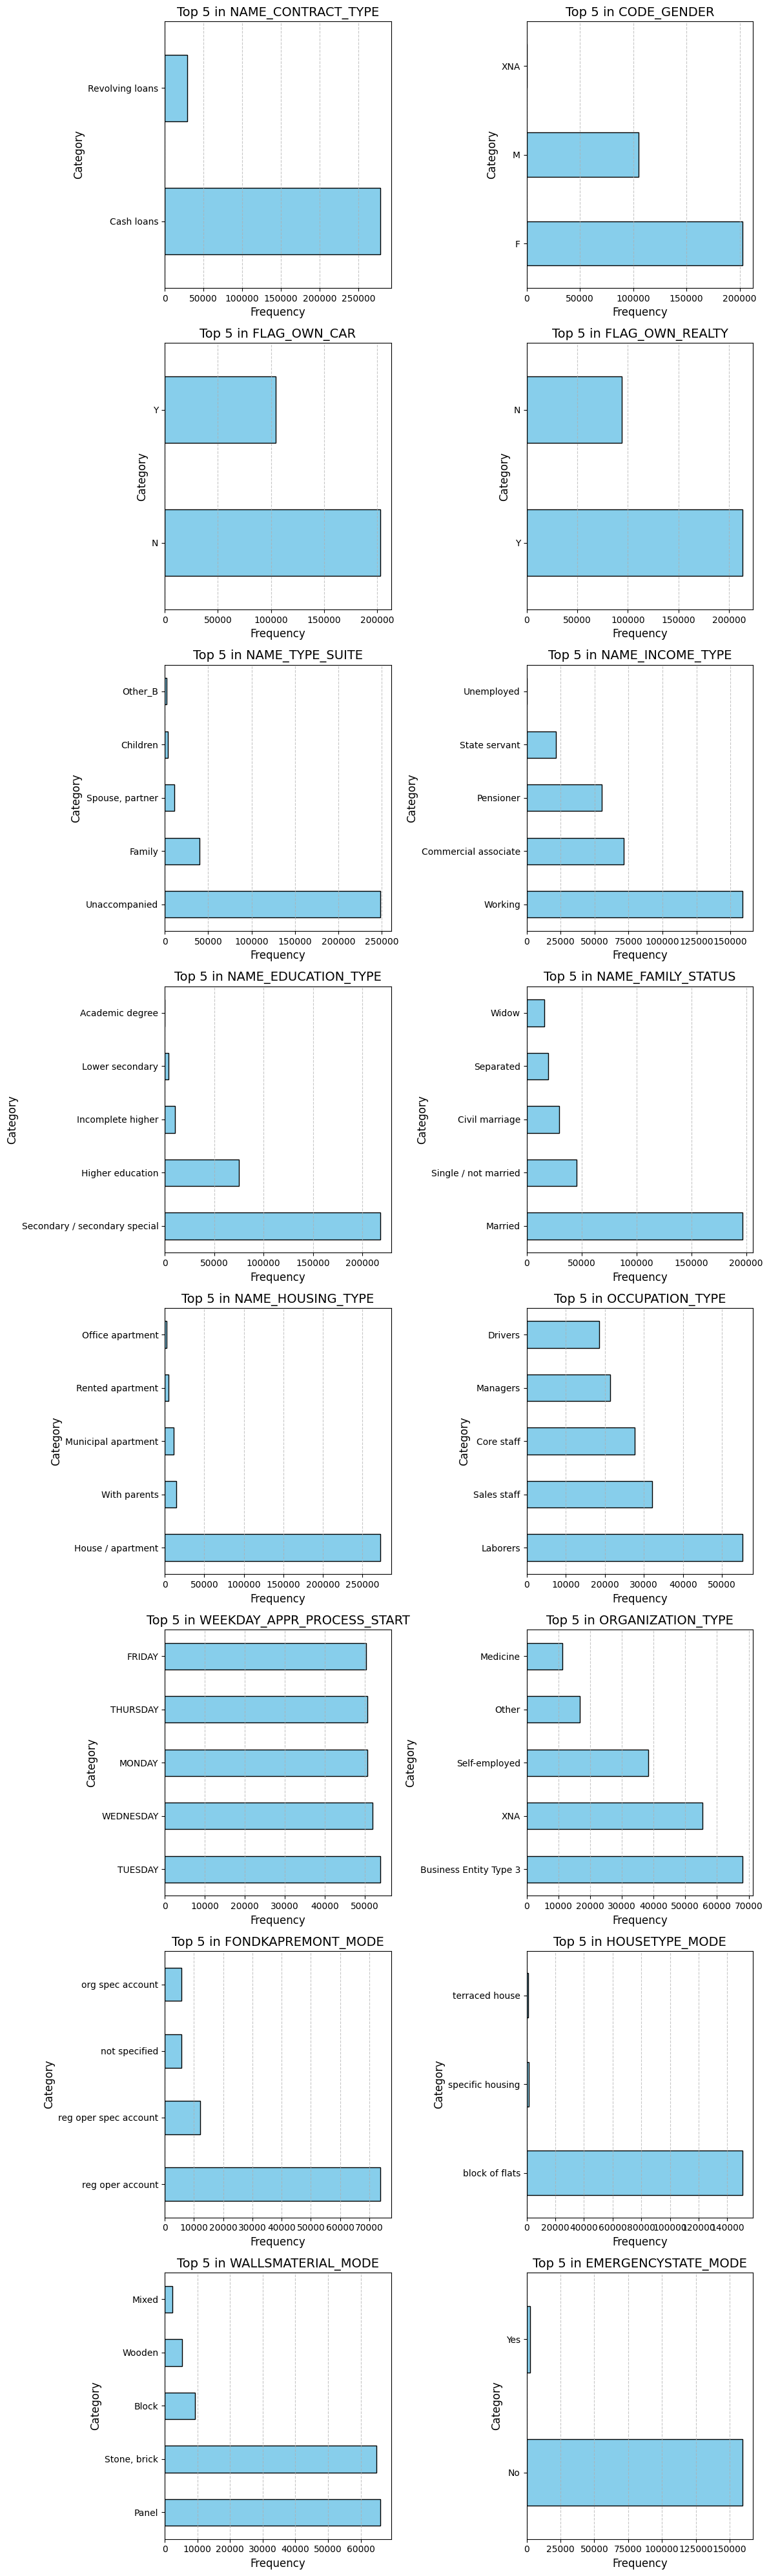

In [28]:
# Selecting categorical columns
categorical_columns = df_train_eda.select_dtypes(include=['object']).columns

# Determine the number of subplots based on the number of categorical columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Dynamically set the figure size
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# Loop to create subplots for each categorical column
for i, categorical_column in enumerate(categorical_columns, 1):
    # Calculate frequencies
    value_counts = df_train_eda[categorical_column].value_counts()
    top_5 = value_counts.head(5)  # Take the top 5 categories
    
    # Create subplot
    plt.subplot(n_rows, n_cols, i)
    top_5.plot(kind='barh', color='skyblue', edgecolor='black')  # Horizontal bar plot
    plt.title(f'Top 5 in {categorical_column}', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

## Distribution of Target

TARGET
0    282686
1     24825
Name: count, dtype: int64


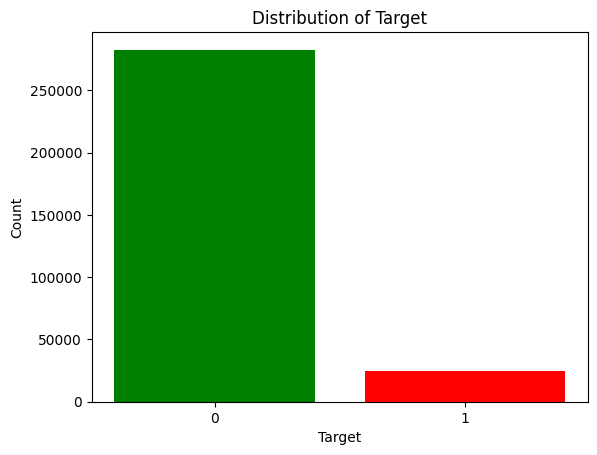

In [99]:
count = df_train_eda['TARGET'].value_counts()
print(count)

plt.bar(count.index, count.values, color=['green','red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')
plt.xticks([0,1],['0','1'])
plt.show()

## Proportion of Target for Each Contract Type

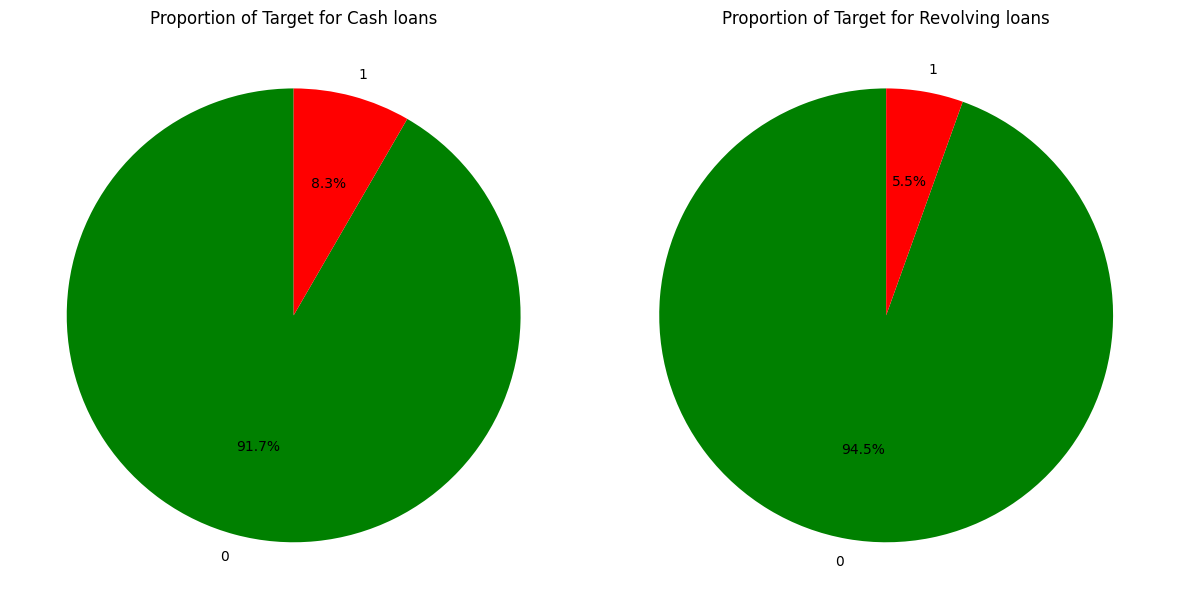

In [128]:
plt.figure(figsize=(12, 6))

for i, contract_type in enumerate(df_train_eda['NAME_CONTRACT_TYPE'].unique()):
    plt.subplot(1, 2, i+1)
    contract_data = df_train_eda[df_train_eda['NAME_CONTRACT_TYPE'] == contract_type]['TARGET'].value_counts()
    plt.pie(contract_data, labels=contract_data.index, autopct='%1.1f%%', startangle=90, colors=['Green','Red'])
    plt.title(f'Proportion of Target for {contract_type}')

plt.tight_layout()
plt.show()


## Facegrid of Target for Gender

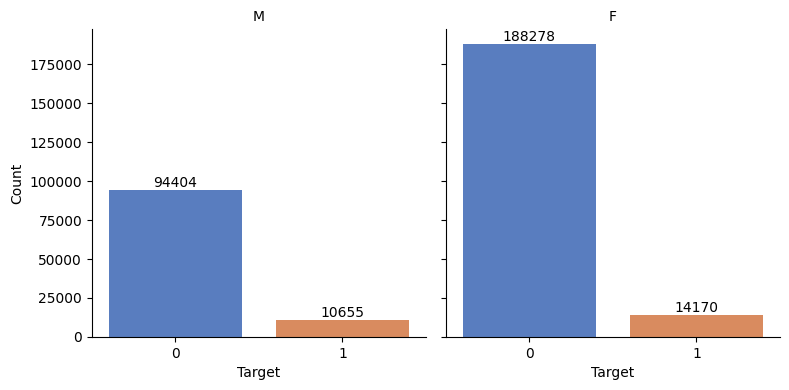

In [148]:
# Filtering data only contain F and M
filtered_df = df_train_eda[df_train_eda['CODE_GENDER'].isin(['F', 'M'])]

# Create function for add value of label at countplot 
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Create FacetGrid
g = sns.FacetGrid(filtered_df, col="CODE_GENDER", height=4, aspect=1)

# Map countplot to FacetGrid
g.map(sns.countplot, "TARGET", order=[0, 1], palette='muted')

# Add label to every plot at facegrid
for ax in g.axes.flat:
    add_labels(ax)

# Adjust label and title
g.set_titles("{col_name}")
g.set_axis_labels("Target", "Count")
plt.show()

## Probability of Acceptance and Rejected Based on Education

TARGET            NAME_EDUCATION_TYPE  acceptance_probability  \
0                     Academic degree                0.981707   
1                    Higher education                0.946449   
2                   Incomplete higher                0.915150   
3                     Lower secondary                0.890723   
4       Secondary / secondary special                0.910601   

TARGET  rejection_probability  
0                    0.018293  
1                    0.053551  
2                    0.084850  
3                    0.109277  
4                    0.089399

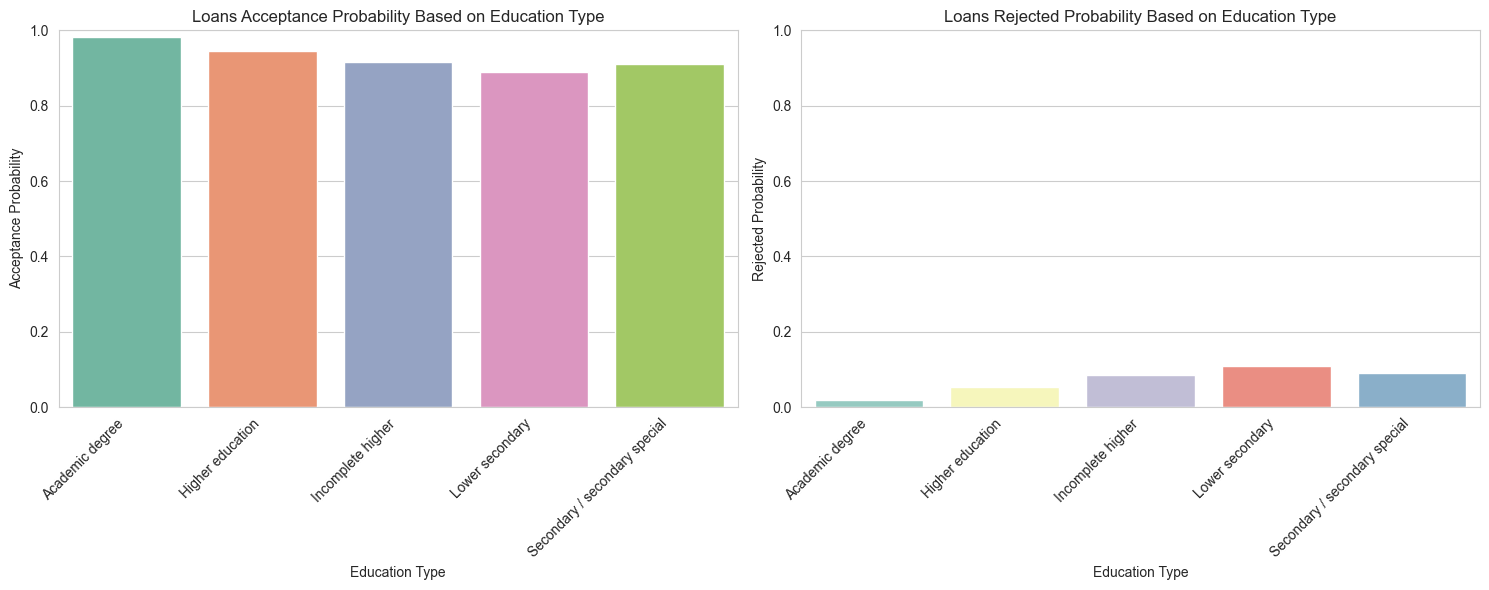


Percentage Analysis:

Education Type: Academic degree
Acceptance Probability: 98.17%
Rejection Probability: 1.83%

Education Type: Higher education
Acceptance Probability: 94.64%
Rejection Probability: 5.36%

Education Type: Incomplete higher
Acceptance Probability: 91.52%
Rejection Probability: 8.48%

Education Type: Lower secondary
Acceptance Probability: 89.07%
Rejection Probability: 10.93%

Education Type: Secondary / secondary special
Acceptance Probability: 91.06%
Rejection Probability: 8.94%


In [268]:
# Calculate of Acceptance Probability (TARGET = 0) and Rejected Probability (TARGET = 1) for each education type
probabilities = (
    df_train_eda.groupby('NAME_EDUCATION_TYPE')['TARGET']
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
    .rename(columns={0: 'acceptance_probability', 1: 'rejection_probability'})
)

# print result
display(probabilities)

# Visualize probability of rejected and acceptance
plt.figure(figsize=(15, 6))

# Plot for acceptance
plt.subplot(1, 2, 1)
sns.barplot(data=probabilities, x='NAME_EDUCATION_TYPE', y='acceptance_probability', palette='Set2')
plt.title('Loans Acceptance Probability Based on Education Type')
plt.xlabel('Education Type')
plt.ylabel('Acceptance Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Plot for rejected
plt.subplot(1, 2, 2)
sns.barplot(data=probabilities, x='NAME_EDUCATION_TYPE', y='rejection_probability', palette='Set3')
plt.title('Loans Rejected Probability Based on Education Type')
plt.xlabel('Education Type')
plt.ylabel('Rejected Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Additional percentage analysis
print("\nPercentage Analysis:")
for index, row in probabilities.iterrows():
    print(f"\nEducation Type: {row['NAME_EDUCATION_TYPE']}")
    print(f"Acceptance Probability: {row['acceptance_probability']*100:.2f}%")
    print(f"Rejection Probability: {row['rejection_probability']*100:.2f}%")

## Probability of Acceptance and Rejected Based on Gender

TARGET CODE_GENDER  acceptance_probability  rejection_probability
0                F                0.930007               0.069993
1                M                0.898581               0.101419

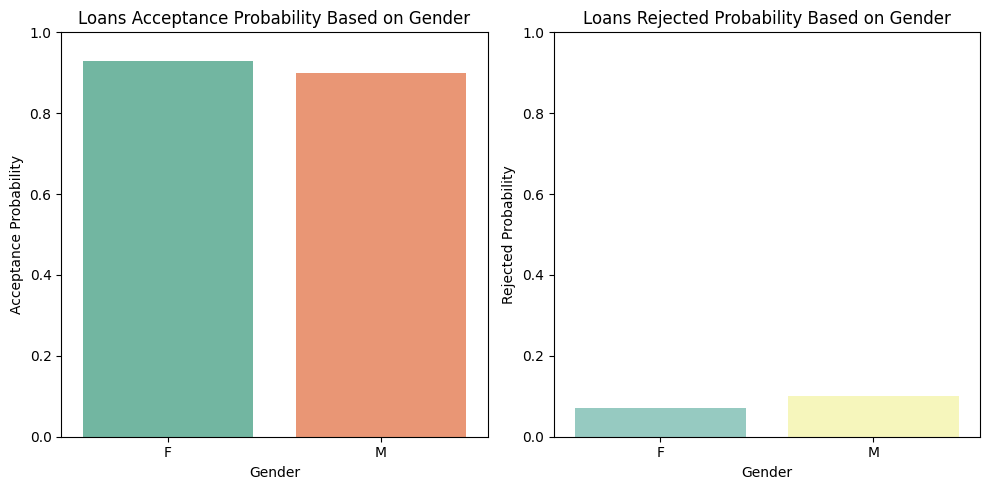

In [163]:
# Filtering data only contain F and M
filtered_df = df_train_eda[df_train_eda['CODE_GENDER'].isin(['F', 'M'])]

# Calculate of Acceptance Probability  (TARGET = 0) and Rejected Probability (TARGET = 1) for each gender
probabilities = (
    filtered_df.groupby('CODE_GENDER')['TARGET']
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
    .rename(columns={0: 'acceptance_probability', 1: 'rejection_probability'})
)

# print result
display(probabilities)

# Visualize probability of rejected and acceptance
plt.figure(figsize=(10, 5))

# Plot for acceptance
plt.subplot(1, 2, 1)
sns.barplot(data=probabilities, x='CODE_GENDER', y='acceptance_probability', palette='Set2')
plt.title('Loans Acceptance Probability Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Probability')
plt.ylim(0, 1)

# Plot for rejected
plt.subplot(1, 2, 2)
sns.barplot(data=probabilities, x='CODE_GENDER', y='rejection_probability', palette='Set3')
plt.title('Loans Rejected Probability Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Rejected Probability')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## Probability of Acceptance and Rejected Based on Job

Top 10 Occupations with the Highest Loan Acceptance Probability:
TARGET        OCCUPATION_TYPE  acceptance_probability  rejection_probability
0                 Accountants                0.951697               0.048303
6       High skill tech staff                0.938401               0.061599
10                   Managers                0.937860               0.062140
3                  Core staff                0.936960               0.063040
5                    HR staff                0.936057               0.063943
7                    IT staff                0.935361               0.064639
12      Private service staff                0.934012               0.065988
11             Medicine staff                0.932998               0.067002
15                Secretaries                0.929502               0.070498
13              Realty agents                0.921438               0.078562

Top 10 Occupations with the Highest Loan Rejection Probability:
TARGET       OCCUPATION

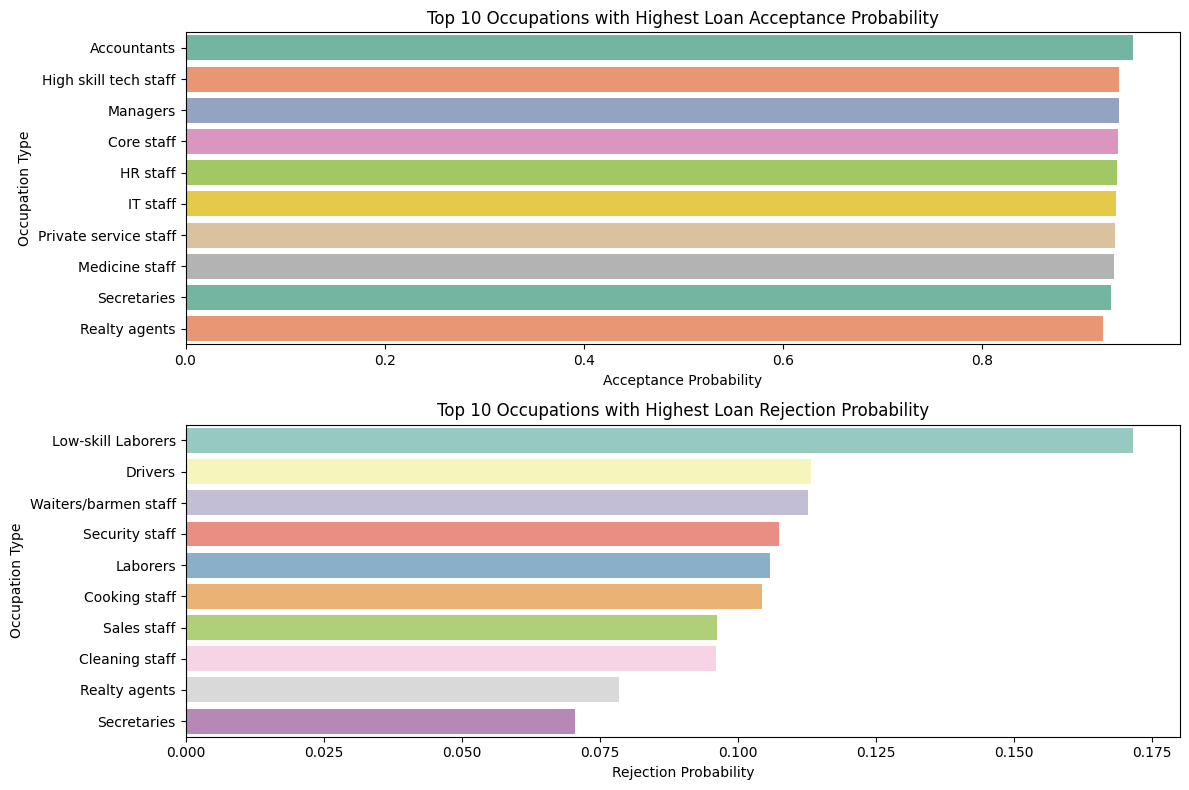

In [173]:
# Filter data to ensure OCCUPATION_TYPE is not null
filtered_df = df_train_eda.dropna(subset=['OCCUPATION_TYPE'])

# Calculate acceptance (TARGET = 0) and rejection (TARGET = 1) probabilities
occupation_probabilities = (
    filtered_df.groupby('OCCUPATION_TYPE')['TARGET']
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
    .rename(columns={0: 'acceptance_probability', 1: 'rejection_probability'})
)

# Get the top 10 occupations with the highest probabilities for acceptance and rejection
top_accepted = occupation_probabilities.nlargest(10, 'acceptance_probability')
top_rejected = occupation_probabilities.nlargest(10, 'rejection_probability')

# Display results
print("Top 10 Occupations with the Highest Loan Acceptance Probability:")
print(top_accepted)

print("\nTop 10 Occupations with the Highest Loan Rejection Probability:")
print(top_rejected)

# Visualization
plt.figure(figsize=(12, 8))

# Plot acceptance probabilities
plt.subplot(2, 1, 1)
sns.barplot(data=top_accepted, y='OCCUPATION_TYPE', x='acceptance_probability', palette='Set2')
plt.title('Top 10 Occupations with Highest Loan Acceptance Probability')
plt.xlabel('Acceptance Probability')
plt.ylabel('Occupation Type')

# Plot rejection probabilities
plt.subplot(2, 1, 2)
sns.barplot(data=top_rejected, y='OCCUPATION_TYPE', x='rejection_probability', palette='Set3')
plt.title('Top 10 Occupations with Highest Loan Rejection Probability')
plt.xlabel('Rejection Probability')
plt.ylabel('Occupation Type')

plt.tight_layout()
plt.show()

## Probability of Acceptance and Rejected Based on Family Status

TARGET    NAME_FAMILY_STATUS  acceptance_probability  rejection_probability
0             Civil marriage                0.900554               0.099446
1                    Married                0.924401               0.075599
2                  Separated                0.918058               0.081942
3       Single / not married                0.901923               0.098077
4                    Unknown                1.000000                    NaN
5                      Widow                0.941758               0.058242

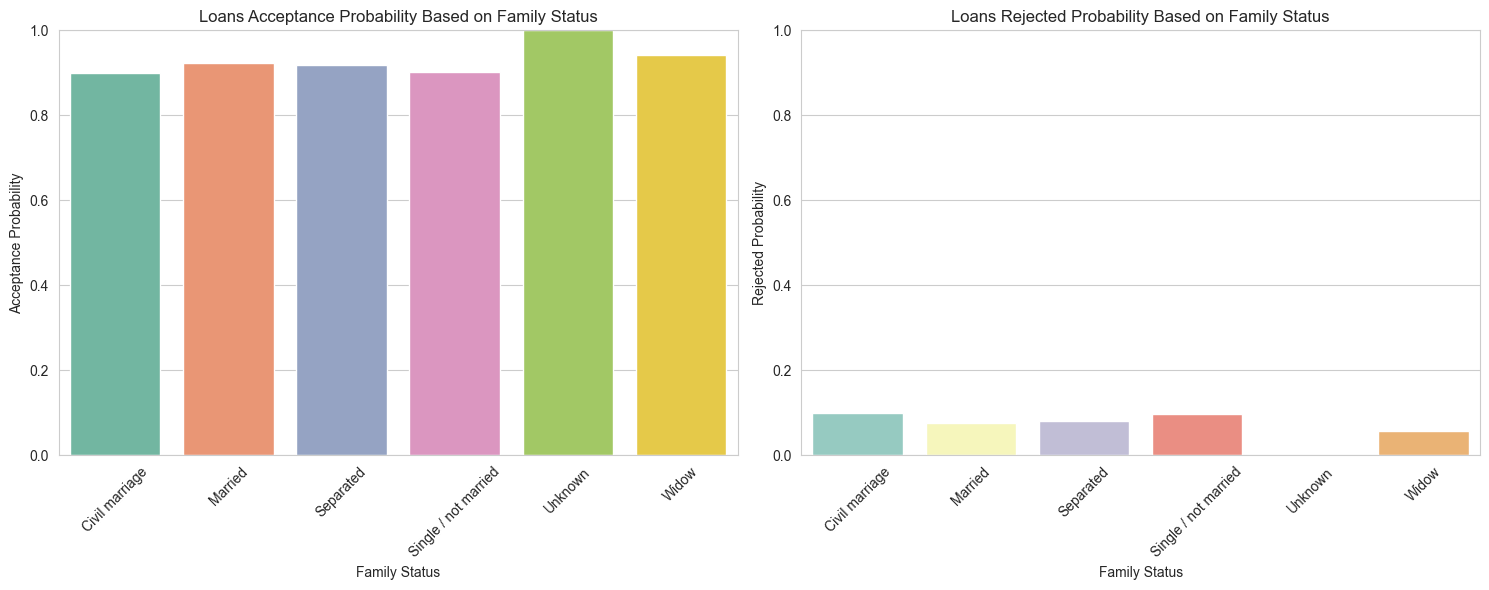

In [252]:
# Filtering data only contain unique family status values
filtered_df = df_train_eda[df_train_eda['NAME_FAMILY_STATUS'].notna()]

# Calculate of Acceptance Probability (TARGET = 0) and Rejected Probability (TARGET = 1) for each family status
probabilities = (
    filtered_df.groupby('NAME_FAMILY_STATUS')['TARGET']
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
    .rename(columns={0: 'acceptance_probability', 1: 'rejection_probability'})
)

# print result
display(probabilities)

# Visualize probability of rejected and acceptance
plt.figure(figsize=(15, 6))  # Made the figure wider to accommodate longer labels

# Plot for acceptance
plt.subplot(1, 2, 1)
sns.barplot(data=probabilities, x='NAME_FAMILY_STATUS', y='acceptance_probability', palette='Set2')
plt.title('Loans Acceptance Probability Based on Family Status')
plt.xlabel('Family Status')
plt.ylabel('Acceptance Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate labels for better readability

# Plot for rejected
plt.subplot(1, 2, 2)
sns.barplot(data=probabilities, x='NAME_FAMILY_STATUS', y='rejection_probability', palette='Set3')
plt.title('Loans Rejected Probability Based on Family Status')
plt.xlabel('Family Status')
plt.ylabel('Rejected Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()
plt.show()

## Income Statistics (Mean, Median, Mode) by TARGET

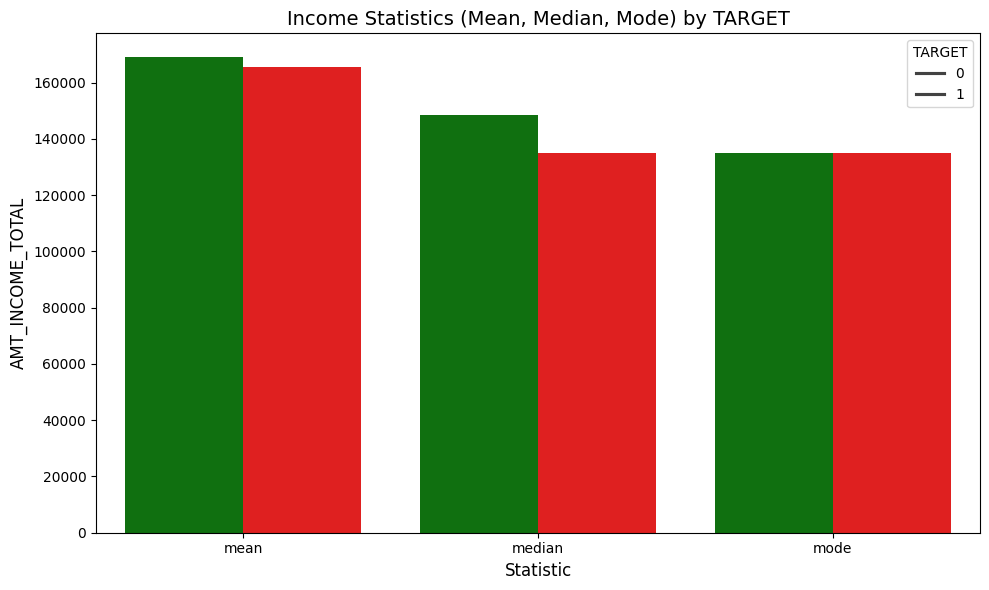

In [228]:
# Calculate mean, median, and mode for AMT_INCOME_TOTAL by TARGET
income_stats = df_train_eda.groupby('TARGET')['AMT_INCOME_TOTAL'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# Melt the data for easier plotting
income_stats_melted = income_stats.melt(id_vars='TARGET', 
                                        value_vars=['mean', 'median', 'mode'], 
                                        var_name='Statistic', 
                                        value_name='AMT_INCOME_TOTAL')

# Define custom palette for TARGET
custom_palette = {0: 'green', 1: 'red'}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=income_stats_melted, 
            x='Statistic', 
            y='AMT_INCOME_TOTAL', 
            hue='TARGET', 
            palette=custom_palette)

# Add labels and title
plt.title('Income Statistics (Mean, Median, Mode) by TARGET', fontsize=14)
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=12)
plt.legend(title='TARGET', labels=['0', '1'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Analysis of Female Characteristics with a Smooth Payment (TARGET=0)

In [279]:
# Filter data for females (CODE_GENDER='F') and TARGET=0
filtered_data = df_train_eda[(df_train_eda['CODE_GENDER'] == 'F') & (df_train_eda['TARGET'] == 0)]

# Analyze characteristics based on NAME_FAMILY_STATUS
family_status_analysis = filtered_data['NAME_FAMILY_STATUS'].value_counts()

# Analyze average, median, and distribution of income (AMT_INCOME_TOTAL)
income_analysis = filtered_data['AMT_INCOME_TOTAL'].describe()

# Analyze characteristics based on OCCUPATION_TYPE
occupation_analysis = filtered_data['OCCUPATION_TYPE'].value_counts()

# Print analysis results
print("Analysis based on Marital Status (NAME_FAMILY_STATUS):")
print(family_status_analysis)
print("\nIncome Analysis (AMT_INCOME_TOTAL):")
print(income_analysis)
print("\nAnalysis based on Occupation Type (OCCUPATION_TYPE):")
print(occupation_analysis)

Analysis based on Marital Status (NAME_FAMILY_STATUS):
NAME_FAMILY_STATUS
Married                 114121
Single / not married     26364
Civil marriage           19016
Separated                14416
Widow                    14360
Unknown                      1
Name: count, dtype: int64

Income Analysis (AMT_INCOME_TOTAL):
count    1.882780e+05
mean     1.559842e+05
std      9.049398e+04
min      2.565000e+04
25%      9.900000e+04
50%      1.350000e+05
75%      1.800000e+05
max      9.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

Analysis based on Occupation Type (OCCUPATION_TYPE):
OCCUPATION_TYPE
Sales staff              25543
Laborers                 21074
Core staff               20481
Managers                 10954
Accountants               9072
Medicine staff            7749
High skill tech staff     6885
Cooking staff             4830
Cleaning staff            3904
Private service staff     2371
Security staff            1841
Secretaries               1163
Waiters/barmen staff

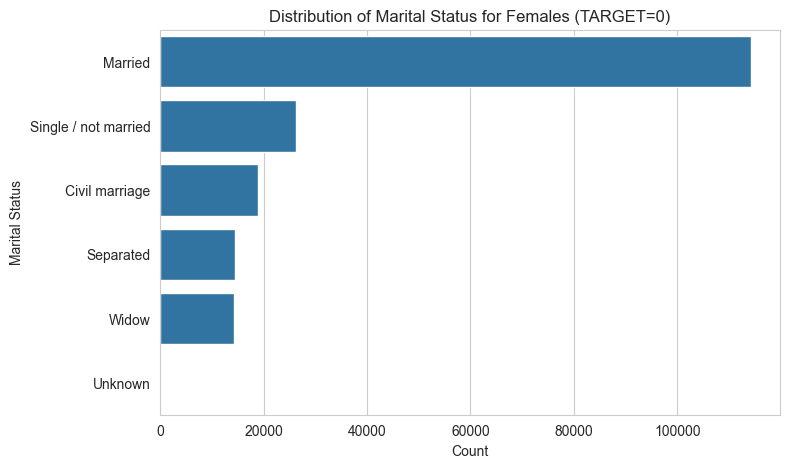

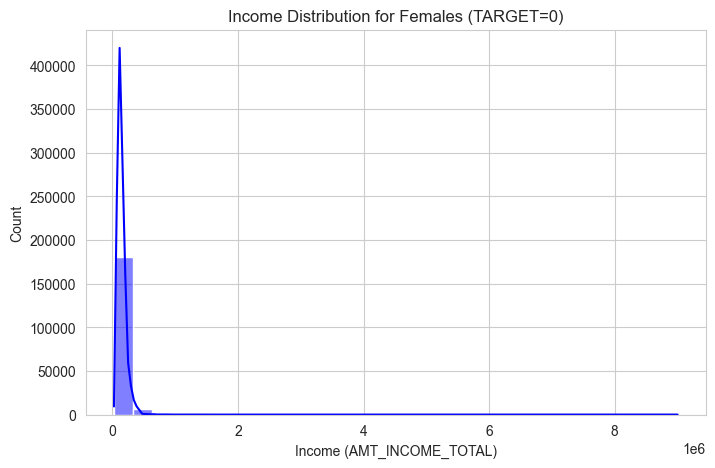

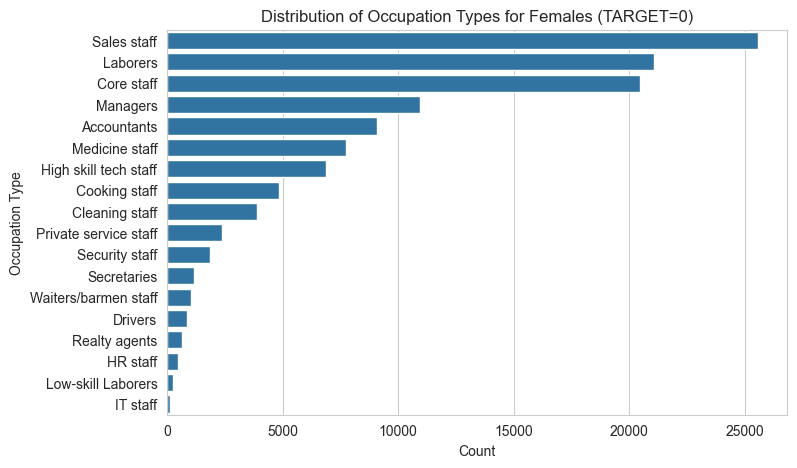

In [281]:
# Visualize Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_data, y='NAME_FAMILY_STATUS', order=family_status_analysis.index)
plt.title('Distribution of Marital Status for Females (TARGET=0)')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

# Visualize Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['AMT_INCOME_TOTAL'], kde=True, bins=30, color='blue')
plt.title('Income Distribution for Females (TARGET=0)')
plt.xlabel('Income (AMT_INCOME_TOTAL)')
plt.ylabel('Count')
plt.show()

# Visualize Occupation Type
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_data, y='OCCUPATION_TYPE', order=occupation_analysis.index)
plt.title('Distribution of Occupation Types for Females (TARGET=0)')
plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.show()

## Several Chart of Good Price Based on Target

In [237]:
# Descriptive statistical analysis
stats_by_target = df_train_eda.groupby('TARGET')['AMT_GOODS_PRICE'].describe()

# Calculate default percentage for each price range
def get_price_range(price):
    if price <= 100000:
        return '0-100k'
    elif price <= 200000:
        return '100k-200k'
    elif price <= 300000:
        return '200k-300k'
    elif price <= 400000:
        return '300k-400k'
    else:
        return '400k+'

df_train_eda['price_range'] = df_train_eda['AMT_GOODS_PRICE'].apply(get_price_range)
default_rates = df_train_eda.groupby('price_range')['TARGET'].mean() * 100

print("Descriptive statistics by TARGET:")
display(stats_by_target)
print("\nDefault percentage by price range:")
display(default_rates)

Descriptive statistics by TARGET:


count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282429.0  542736.795003  373785.493533  40500.0  238500.0  450000.0   
1        24804.0  488972.412554  311636.495297  45000.0  238500.0  450000.0   

             75%        max  
TARGET                       
0       688500.0  4050000.0  
1       675000.0  3600000.0


Default percentage by price range:


price_range
0-100k        6.039729
100k-200k     7.689040
200k-300k     8.417648
300k-400k    10.509449
400k+         7.836539
Name: TARGET, dtype: float64

In [241]:
def create_loan_visualizations(df):
    # Set style
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 20))
    
    # 1. Box Plot
    plt.subplot(4, 1, 1)
    sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=df)
    plt.title('Distribution of Goods Price by Target (Box Plot)')
    plt.xlabel('Target (0: Non-Default, 1: Default)')
    plt.ylabel('Goods Price')
    
    # 2. Violin Plot
    plt.subplot(4, 1, 2)
    sns.violinplot(x='TARGET', y='AMT_GOODS_PRICE', data=df)
    plt.title('Distribution of Goods Price by Target (Violin Plot)')
    plt.xlabel('Target (0: Non-Default, 1: Default)')
    plt.ylabel('Goods Price')
    
    # 3. Histogram with KDE
    plt.subplot(4, 1, 3)
    sns.histplot(data=df, x='AMT_GOODS_PRICE', hue='TARGET', multiple="layer", alpha=0.5)
    plt.title('Distribution of Goods Price by Target (Histogram)')
    plt.xlabel('Goods Price')
    plt.ylabel('Count')
    
    # 4. Bar Plot of Default Rates by Price Range
    plt.subplot(4, 1, 4)
    default_rates = df.groupby('price_range')['TARGET'].mean() * 100
    default_rates.plot(kind='bar')
    plt.title('Default Rate by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Function for additional insights using KDE plot
def create_kde_plot(df):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df[df['TARGET'] == 0]['AMT_GOODS_PRICE'], label='Non-Default (0)', alpha=0.5)
    sns.kdeplot(data=df[df['TARGET'] == 1]['AMT_GOODS_PRICE'], label='Default (1)', alpha=0.5)
    plt.title('Density Distribution of Goods Price by Target')
    plt.xlabel('Goods Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

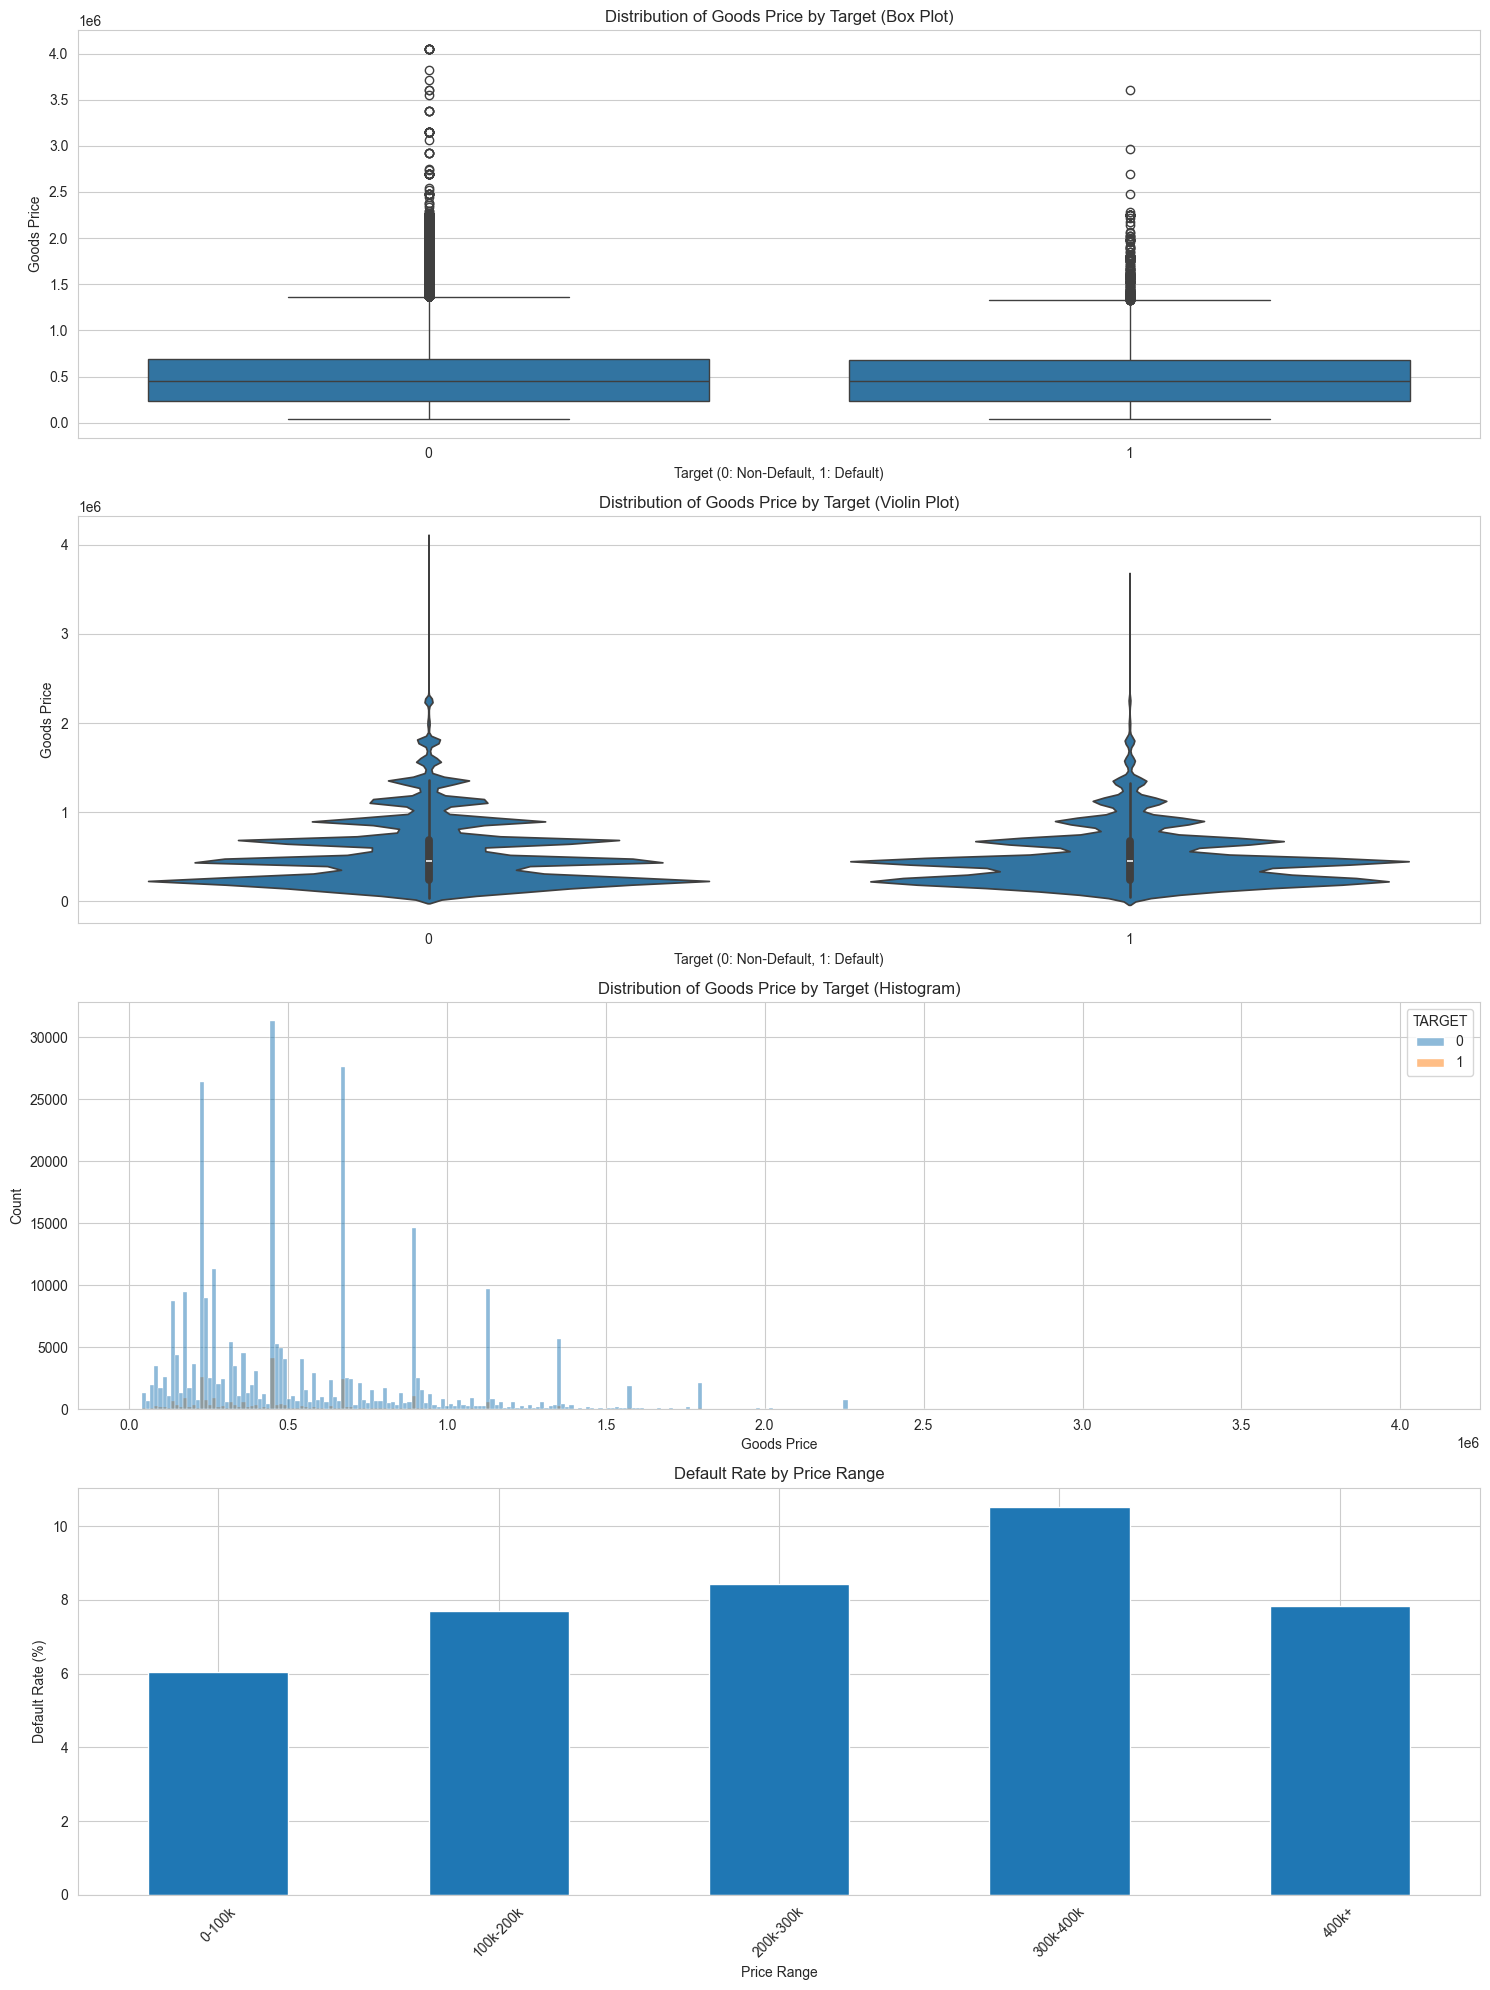

In [243]:
create_loan_visualizations(df_train_eda)

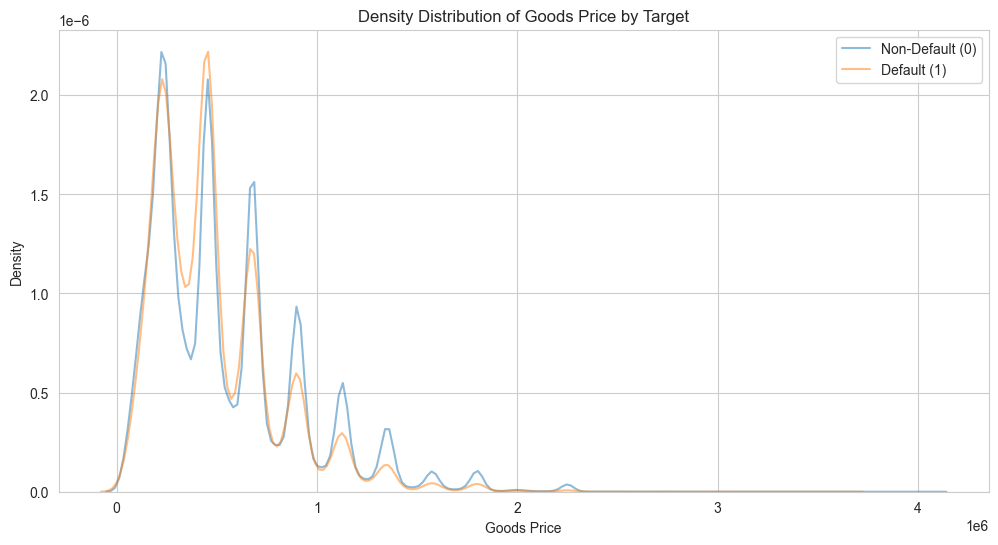

In [247]:
create_kde_plot(df_train_eda)

## Chi Square Test

In [191]:
from scipy.stats import chi2_contingency

# Select categorical features
categorical_features = df_train_eda.select_dtypes(include=['object'])

# Perform Chi-Square test for each categorical feature
for col in categorical_features.columns:
    contingency_table = pd.crosstab(df_train_eda[col], df_train_eda['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {col}, Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

Feature: NAME_CONTRACT_TYPE, Chi-Square Statistic: 293.15, p-value: 0.0000
Feature: CODE_GENDER, Chi-Square Statistic: 920.79, p-value: 0.0000
Feature: FLAG_OWN_CAR, Chi-Square Statistic: 146.66, p-value: 0.0000
Feature: FLAG_OWN_REALTY, Chi-Square Statistic: 11.58, p-value: 0.0007
Feature: NAME_TYPE_SUITE, Chi-Square Statistic: 32.83, p-value: 0.0000
Feature: NAME_INCOME_TYPE, Chi-Square Statistic: 1253.47, p-value: 0.0000
Feature: NAME_EDUCATION_TYPE, Chi-Square Statistic: 1019.21, p-value: 0.0000
Feature: NAME_FAMILY_STATUS, Chi-Square Statistic: 504.69, p-value: 0.0000
Feature: NAME_HOUSING_TYPE, Chi-Square Statistic: 420.56, p-value: 0.0000
Feature: OCCUPATION_TYPE, Chi-Square Statistic: 1402.85, p-value: 0.0000
Feature: WEEKDAY_APPR_PROCESS_START, Chi-Square Statistic: 15.39, p-value: 0.0174
Feature: ORGANIZATION_TYPE, Chi-Square Statistic: 1609.24, p-value: 0.0000
Feature: FONDKAPREMONT_MODE, Chi-Square Statistic: 16.81, p-value: 0.0008
Feature: HOUSETYPE_MODE, Chi-Square Statis

Conclusion:

The Chi-Square test results show that almost all categorical features in the dataset have a significant relationship with TARGET (because the p-value < 0.05). However:

The Chi-Square values provide additional information about the strength of the relationship. Features with very large Chi-Square values, such as OCCUPATION_TYPE (1402.85) and ORGANIZATION_TYPE (1609.24), are likely to have a strong impact on TARGET.

## Heatmap Correlation 

In [189]:
# Select numeric features only
numeric_features = df_train_eda.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_features.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(100, 100))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 2. Data Preprocessing

In [12]:
df_train_model = df_train.copy()

In [14]:
df_train_model.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Handle Unnecessary Columns 

In [90]:
# print columns name
for col in df_train_model.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

Conclusion:  
1. The columns 'FLAG_DOCUMENT' and 'EXT_SOURCE' will be removed because they are not representative and have unclear meanings.  
2. The column 'FLAG_PHONE' will be removed because it has the same meaning as 'FLAG_WORK_PHONE'.  

In [16]:
# Drop specified columns from the DataFrame
columns_to_drop = ['FLAG_PHONE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_train_model = df_train_model.drop(columns=columns_to_drop, axis=1)

In [18]:
df_train_model.shape

(307511, 98)

## Handle Missing Value

In [20]:
# Ensure all columns are displayed
pd.set_option('display.max_rows', None)

# Calculate the number of null values for each column
null_columns = df_train_model.isnull().sum()
null_columns = null_columns[null_columns > 0]

if not null_columns.empty:
    # Calculate the percentage of missing values
    missing_percentage = (null_columns / len(df_train_model)) * 100
    null_info = pd.DataFrame({
        'Missing Count': null_columns,
        'Missing Percentage (%)': missing_percentage
    })
    print("Columns with null values and their counts/percentages:")
    print(null_info)
else:
    print("No columns have null values.")

# Calculate the total number of columns with null values
total_null_columns = (df_train_model.isnull().sum() > 0).sum()
print(f"Total number of columns with null values: {total_null_columns}")

Columns with null values and their counts/percentages:
                              Missing Count  Missing Percentage (%)
AMT_ANNUITY                              12                0.003902
AMT_GOODS_PRICE                         278                0.090403
NAME_TYPE_SUITE                        1292                0.420148
OWN_CAR_AGE                          202929               65.990810
OCCUPATION_TYPE                       96391               31.345545
CNT_FAM_MEMBERS                           2                0.000650
APARTMENTS_AVG                       156061               50.749729
BASEMENTAREA_AVG                     179943               58.515956
YEARS_BEGINEXPLUATATION_AVG          150007               48.781019
YEARS_BUILD_AVG                      204488               66.497784
COMMONAREA_AVG                       214865               69.872297
ELEVATORS_AVG                        163891               53.295980
ENTRANCES_AVG                        154828               50.

The columns have percentage of missing values more than 20% will be dropped.

In [22]:
# Calculate the percentage of missing values for each column
missing_percentage = df_train_model.isnull().sum() / len(df_train_model) * 100

# Filter columns with more than 20% missing values
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns
df_train_model_cleaned = df_train_model.drop(columns=columns_to_drop)

# Display the columns that were dropped
print(f"Columns dropped (more than 20% missing values): {list(columns_to_drop)}")
print(f"Shape before dropping columns: {df_train_model.shape}")
print(f"Shape after dropping columns: {df_train_model_cleaned.shape}")

Columns dropped (more than 20% missing values): ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALARE

Imputing missing value with median for numerical columns and mode for categorical columns.

In [24]:
# Impute missing values for numeric columns (int64 and float64) with the median
numeric_columns = df_train_model_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    df_train_model_cleaned[col].fillna(df_train_model_cleaned[col].median(), inplace=True)

# Impute missing values for categorical columns (object) with the mode
categorical_columns = df_train_model_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_train_model_cleaned[col].fillna(df_train_model_cleaned[col].mode()[0], inplace=True)

print("Missing values have been imputed.")

Missing values have been imputed.


## Handle Duplicate Rows

In [369]:
duplicated_data = df_train_model_cleaned.duplicated().any()

if duplicated_data == False:
    print('Data has not duplicate rows')
else:
    print('Data has duplicate rows')

Data has not duplicate rows


## Handle Anomalies

In [26]:
print(df_train_model_cleaned['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [28]:
# Replace XNA with mode
mode_gender = df_train_model_cleaned['CODE_GENDER'].mode()[0]
df_train_model_cleaned['CODE_GENDER'] = df_train_model_cleaned['CODE_GENDER'].replace('XNA', mode_gender)

In [30]:
df_train_model_cleaned['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [32]:
# Replace 'XNA' with 'Unknown' in the column ORGANIZATION_TYPE
df_train_model_cleaned['ORGANIZATION_TYPE'] = df_train_model_cleaned['ORGANIZATION_TYPE'].replace('XNA', 'Unknown')

In [34]:
# selected column
columns_to_modify = ['DAYS_BIRTH', 'DAYS_REGISTRATION','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# transform negative to positive value
df_train_model_cleaned[columns_to_modify] = df_train_model_cleaned[columns_to_modify].abs()

## Feature Encoding

In [36]:
df_train_model_cleaned.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                 1           0              1.0                     2   
1                 1           0              2.0                     1   
2                 1           0              1.0                     2   
3                 1           0              2.0                     2   
4                 1           0              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0         

### Label Encoding

In [38]:
# Mapping for CODE_GENDER Column
gender_mapping = {
    'M': 1,
    'F': 0
}


# Mapping for FLAG_OWN_CAR column
own_car_mapping = {
    'Y': 1,
    'N': 0
}

# Mapping for FLAG_OWN_REALTY column
own_realty_mapping = {
   'Y':1,
   'N':0
}


# Mapping for Education type columns
education_mapping = {
    'Lower secondary': 1, 
    'Secondary / secondary special': 2, 
    'Incomplete higher': 3,  
    'Higher education': 4,  
    'Academic degree': 5  
}

# Performing mapping
df_train_model_cleaned['CODE_GENDER'] = df_train_model_cleaned['CODE_GENDER'].map(gender_mapping)
df_train_model_cleaned['FLAG_OWN_CAR'] = df_train_model_cleaned['FLAG_OWN_CAR'].map(own_car_mapping)
df_train_model_cleaned['FLAG_OWN_REALTY'] = df_train_model_cleaned['FLAG_OWN_REALTY'].map(own_realty_mapping)
df_train_model_cleaned['NAME_EDUCATION_TYPE'] = df_train_model_cleaned['NAME_EDUCATION_TYPE'].map(education_mapping)

### One Hot Encoding

In [40]:
# List of columns to apply One-Hot Encoding
columns_to_encode = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


# Apply One-Hot Encoding
df_train_model_cleaned= pd.get_dummies(df_train_model_cleaned, columns=columns_to_encode, prefix=columns_to_encode)

# Identifying columns resulting from one-hot encoding with boolean data type
bool_columns = df_train_model_cleaned.select_dtypes(include='bool').columns

# Changing data type from boolean to integer
df_train_model_cleaned[bool_columns] = df_train_model_cleaned[bool_columns].astype(int)

In [42]:
df_train_model_cleaned.head()

SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1            1             0                1   
1      100003       0            0             0                0   
2      100004       0            1             1                1   
3      100006       0            0             0                1   
4      100007       0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                    2                    0.018801        9461            637   
1                    4                    0.003541       16765           1188   
2                    2                    0.010032       19046            225   
3                    2                    0.008019       19005           3039   
4                    2                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           0              1.0   
1                0                 1           0              2.0   
2                1                 1           0              1.0   
3                0                 1           0              2.0   
4                0                 1           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0                        0                       2.0   
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0  

In [44]:
df_train_model_cleaned.shape

(307511, 136)

## Handle Class Imbalance

TARGET
0    282686
1     24825
Name: count, dtype: int64


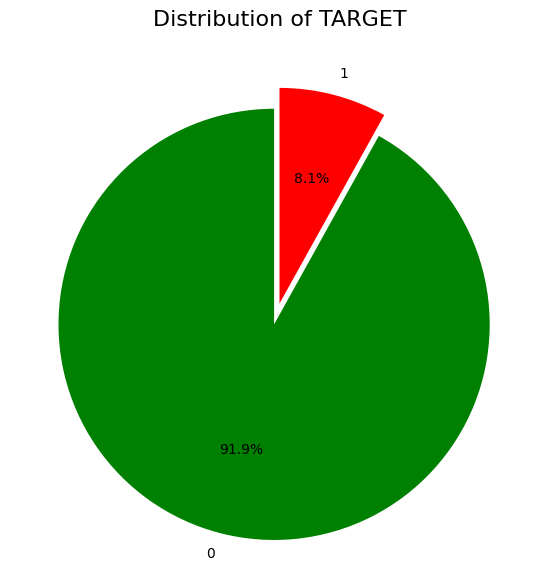

In [46]:
# Calculate the frequency of values in the 'TARGET' column
value_counts = df_train_model_cleaned['TARGET'].value_counts()
print(value_counts)

# Create a pie chart
plt.figure(figsize=(7, 7))
value_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start rotation at 90 degrees
    colors=['green', 'red'],  # Colors for the categories
    labels=value_counts.index,  # Labels based on unique values
    explode=(0.1, 0)            # Slightly separate the first category
)
plt.title('Distribution of TARGET', fontsize=16)
plt.ylabel('')  # Remove the Y-axis label
plt.show()

In [48]:
# Determining the target count for the minority class
majority_class_count = 282686
target_minority_count = 197880  # 70% of the majority class

# Separating features and labels
X = df_train_model_cleaned.drop(columns=['TARGET'])
y = df_train_model_cleaned['TARGET']

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy={1: target_minority_count}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate the DataFrame with the oversampled data
df_train_model_cleaned = pd.concat([X_resampled, y_resampled], axis=1)

# View class distribution after oversampling
print(df_train_model_cleaned['TARGET'].value_counts())

TARGET
0    282686
1    197880
Name: count, dtype: int64


In [50]:
df_train_model_cleaned.shape

(480566, 136)

## Handle Outliers

In [52]:
# Select numerical columns
numerical_cols = df_train_model_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Calculate the lower and upper bounds for detecting outliers using IQR
Q1 = df_train_model_cleaned[numerical_cols].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_train_model_cleaned[numerical_cols].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range (IQR)

# Calculate the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark rows that are outliers (True for outliers)
outliers = (df_train_model_cleaned[numerical_cols] < lower_bound) | (df_train_model_cleaned[numerical_cols] > upper_bound)

# Check the number of outliers in each column
outliers_count = outliers.sum()

# Calculate the percentage of outliers in each column
outliers_percentage = (outliers_count / len(df_train_model_cleaned)) * 100

# Create a DataFrame to display outlier counts and percentages
outliers_info = pd.DataFrame({
    'Outlier Count': outliers_count,
    'Outlier Percentage (%)': outliers_percentage
}).sort_values(by='Outlier Percentage (%)', ascending=False)

# Display the outlier information
print("Outlier information for numerical columns:")
print(outliers_info)

# Count the number of rows that have outliers in any column
outlier_rows = outliers.any(axis=1).sum()

# Calculate the overall percentage of rows with outliers
overall_outlier_percentage = (outlier_rows / len(df_train_model_cleaned)) * 100
print(f"Overall percentage of rows with outliers: {overall_outlier_percentage:.2f}%")

Outlier information for numerical columns:
                             Outlier Count  Outlier Percentage (%)
NAME_EDUCATION_TYPE                 123520               25.703025
REGION_RATING_CLIENT                107549               22.379652
REGION_RATING_CLIENT_W_CITY         105210               21.892935
AMT_REQ_CREDIT_BUREAU_QRT            97182               20.222404
REG_CITY_NOT_WORK_CITY               89432               18.609723
AMT_REQ_CREDIT_BUREAU_MON            85633               17.819197
DEF_30_CNT_SOCIAL_CIRCLE             82608               17.189730
DAYS_EMPLOYED                        81040               16.863449
FLAG_EMP_PHONE                       76168               15.849644
FLAG_WORK_PHONE                      74940               15.594112
LIVE_CITY_NOT_WORK_CITY              65137               13.554226
DEF_60_CNT_SOCIAL_CIRCLE             62490               13.003417
OBS_30_CNT_SOCIAL_CIRCLE             30127                6.269066
OBS_60_CNT_SOCIAL_C

In [54]:
def cap_outliers(data, columns, target_column):
    """
    Caps outliers in numeric columns based on the IQR method.
    
    Parameters:
    - data: DataFrame containing the data.
    - columns: List of columns to check for outliers.
    - target_column: Column to exclude from capping.
    """
    for col in columns:
        if col != target_column:  # Skip the target column
            Q1 = data[col].quantile(0.25)  # First quartile
            Q3 = data[col].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range
            
            lower_bound = Q1 - 1.5 * IQR  # Lower bound
            upper_bound = Q3 + 1.5 * IQR  # Upper bound
            
            # Apply capping
            data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Specify the target column
target_column = 'TARGET'  # Replace with the name of your target column

# Select numeric columns only
numeric_columns = df_train_model_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Perform capping on numeric columns excluding the target column
cap_outliers(df_train_model_cleaned, numeric_columns, target_column)

print("Capping outliers is complete.")

Capping outliers is complete.


# 3. Modeling

## Define Feature (X) and Target (y)

In [296]:
X = df_train_model_cleaned.drop(['TARGET','SK_ID_CURR'],axis=1)
y = df_train_model_cleaned['TARGET']

## Split Data Into Train and Test

In [298]:
# split data into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [300]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336396, 134)
(144170, 134)
(336396,)
(144170,)


## Feature Scaling

In [302]:
# Create object scaler
minmax = MinMaxScaler()
standard = StandardScaler()

# Fit and transform the data
data_train_scaled = minmax.fit_transform(X_train)
data_test_scaled = minmax.fit_transform(X_test)
data_train_standard = standard.fit_transform(X_train)
data_test_standard = standard.fit_transform(X_test)

# Convert scaled data to a DataFrame with original column names
X_train_scaled = pd.DataFrame(data_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data_test_scaled, columns=X_test.columns)

X_train_standard = pd.DataFrame(data_train_standard, columns=X_train.columns)
X_test_standard = pd.DataFrame(data_test_standard, columns=X_test.columns)

## Logistic Regression

In [70]:
# initiate model
logreg = LogisticRegression(class_weight='balanced',random_state=42)

# fit model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [72]:
# Predict on data test
y_pred_logreg = logreg.predict(X_test_scaled)

In [74]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9350869616458888
Precision: 0.9998644146587123
Recall: 0.8702564189018325


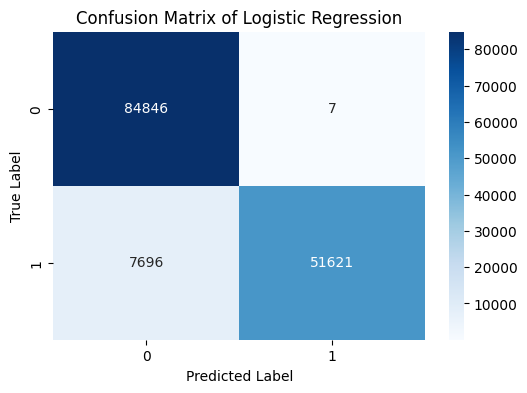

In [76]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Decision Tree

In [436]:
# initiate model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

# fit model
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [438]:
# predict on data test
y_pred_dt = dt_model.predict(X_test_scaled)

In [440]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.843785379680436
Precision: 0.9695863464087242
Recall: 0.7029856533540132


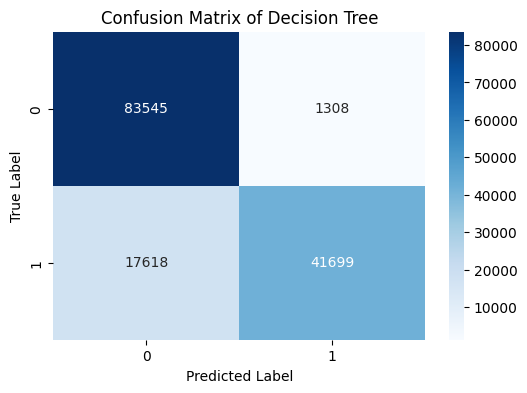

In [442]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## KNN

In [444]:
# initiate model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

# fit model
knn_model.fit(X_train_standard, y_train)

KNeighborsClassifier(metric='euclidean')

In [446]:
# Predict on data test
y_pred_knn = knn_model.predict(X_test_standard)

In [448]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9291022762602481
Precision: 0.9814691501303248
Recall: 0.8696832274052969


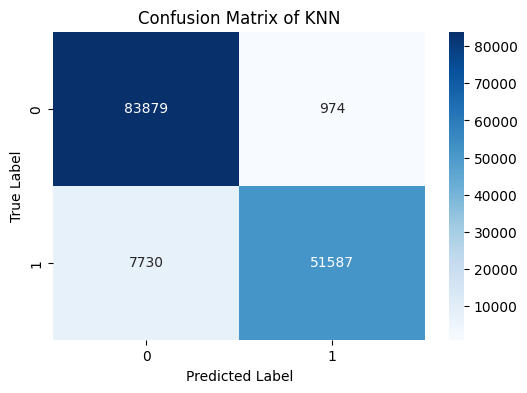

In [450]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [452]:
# initiate random forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# fit model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [454]:
# Predict on data test
y_pred_rf = rf_model.predict(X_test_scaled)

In [456]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9314775092465604
Precision: 0.9999413982380404
Recall: 0.8629903737545729


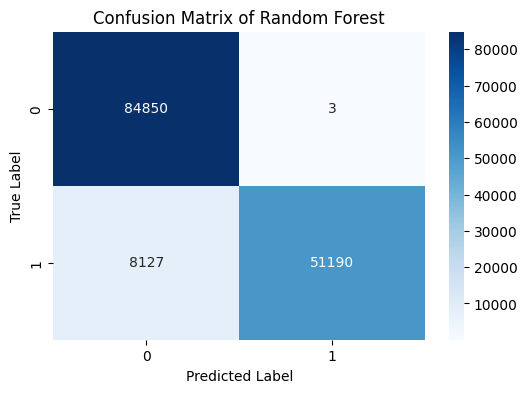

In [458]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## AdaBoost

In [304]:
# initiate Adaboost model
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1, random_state=42)

In [306]:
# fit model
adaboost_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=42)

In [308]:
# Predict on data test
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

In [310]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9188351239110343
Precision: 0.9918821824821864
Recall: 0.8424903484667128


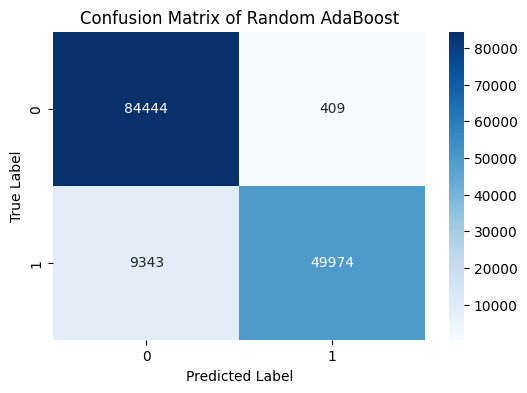

In [468]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of Random AdaBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## XGBoost

In [470]:
# initiate model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metrics='logloss'
)

# fit model
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [472]:
# Predict on data test
y_pred_xgboost = xgb_model.predict(X_test_scaled)

In [474]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgboost)
precision = precision_score(y_test, y_pred_xgboost)
recall = recall_score(y_test, y_pred_xgboost)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9209838663452299
Precision: 1.0
Recall: 0.8419677326904598


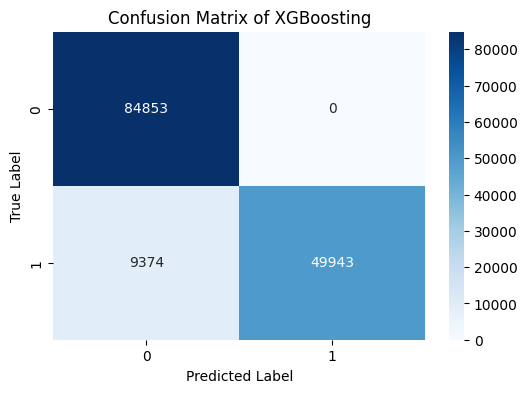

In [476]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgboost)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of XGBoosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting

In [478]:
# initiate model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1, 
    max_depth = 3,
    random_state=42
)

# fit model
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [480]:
# Predict on data test
y_pred_gb = gb_model.predict(X_test_scaled)

In [482]:
# Metric Evaluation
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)

print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Balanced Accuracy: 0.9206804120235346
Precision: 1.0
Recall: 0.8413608240470691


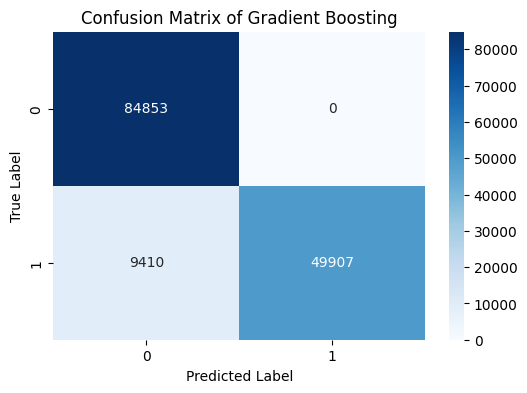

In [484]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix of Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Model Interpretation

## Feature Importance 

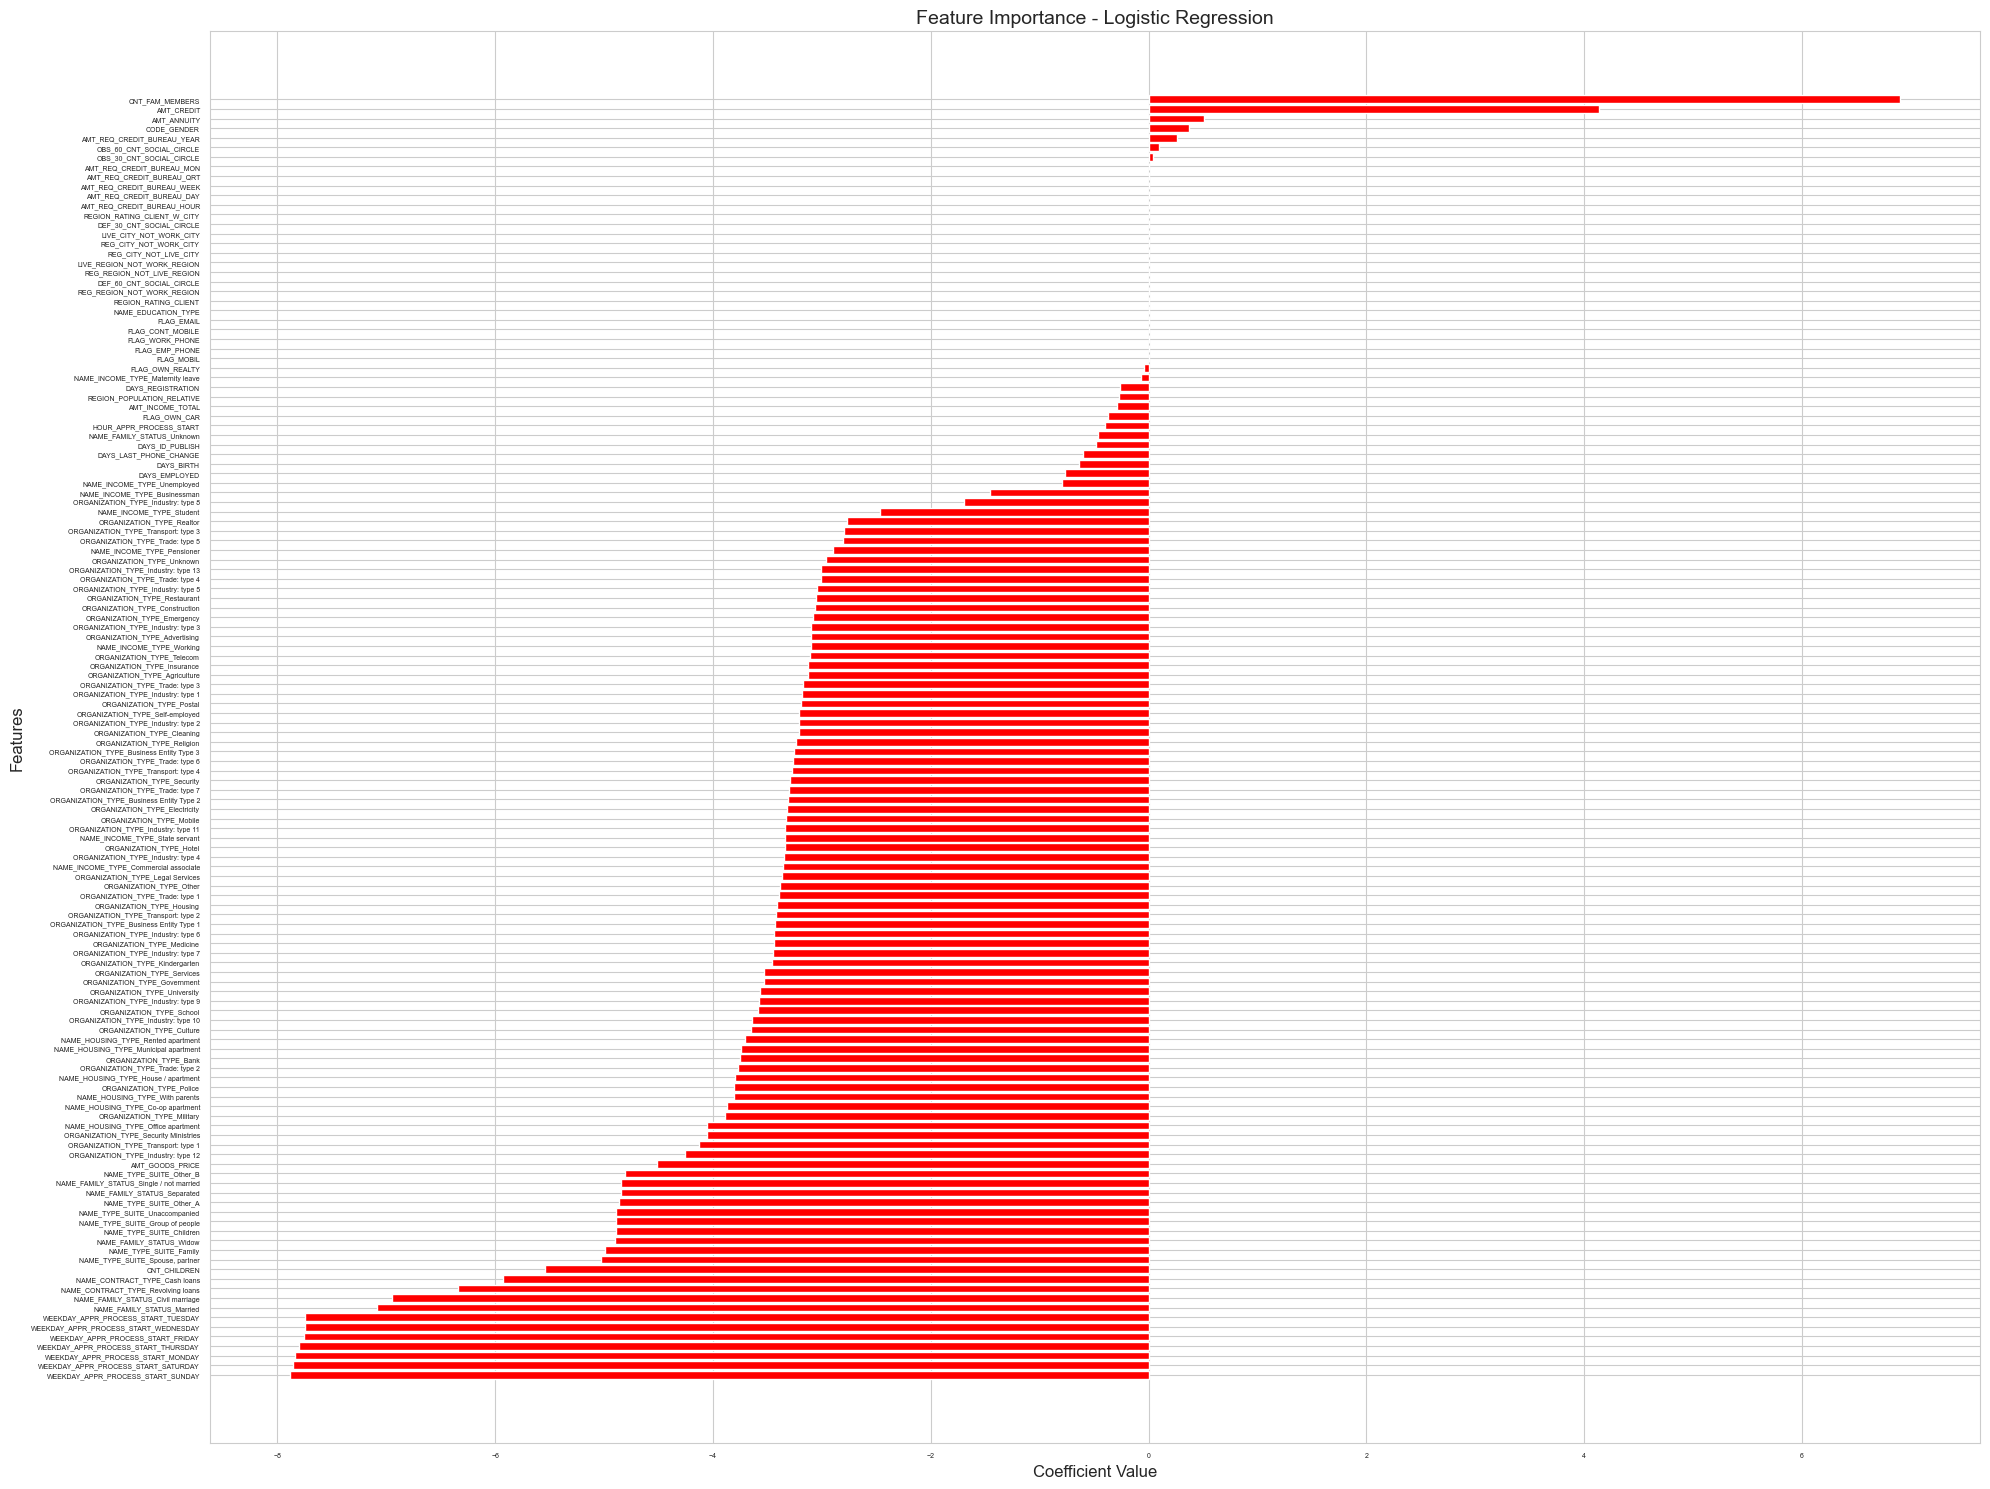

In [288]:
# Model coefficients
coefficients = logreg.coef_[0]

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(20, 15))  # Adjust the figure size for better proportions
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='Red')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()

# Adjust y-axis ticks
plt.yticks(fontsize=5)  
plt.xticks(fontsize=5)  
plt.tight_layout()  
plt.show()

In [317]:
print(feature_importance)

                                      Feature  Importance
19                            CNT_FAM_MEMBERS    6.897520
5                                  AMT_CREDIT    4.133318
6                                 AMT_ANNUITY    0.513477
0                                 CODE_GENDER    0.368447
39                 AMT_REQ_CREDIT_BUREAU_YEAR    0.264777
31                   OBS_60_CNT_SOCIAL_CIRCLE    0.099188
29                   OBS_30_CNT_SOCIAL_CIRCLE    0.042199
37                  AMT_REQ_CREDIT_BUREAU_MON    0.000000
38                  AMT_REQ_CREDIT_BUREAU_QRT    0.000000
36                 AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
35                  AMT_REQ_CREDIT_BUREAU_DAY    0.000000
34                 AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
21                REGION_RATING_CLIENT_W_CITY    0.000000
30                   DEF_30_CNT_SOCIAL_CIRCLE    0.000000
28                    LIVE_CITY_NOT_WORK_CITY    0.000000
27                     REG_CITY_NOT_WORK_CITY    0.000000
26            

# 5. Business Recommendation

| **Insight**                                              | **Recommendation**                                                                                                                           | **Action Plan**                                                                                                                                                                                                                                | **Impact**                                                                                       |
|----------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Top Occupations with High Loan Acceptance Probability** | Focus on job segments with high acceptance probabilities such as *Accountants*, *High Skill Tech Staff*, and *Managers*.                   | - Create targeted marketing campaigns for these jobs on Social Media.<br>- Build partnerships with companies in related sectors for direct employee loans.                                                                                        | - Increase loan application approvals.<br>- Reduce default risk.                               |
| **Characteristics of Female Borrowers with Smooth Payment** | Focus on female clients, especially married women, and dominant occupations (*Sales Staff*, *Laborers*, *Core Staff*, *Managers*).         | - Provide rewards such as cashback or lower interest rates for women with smooth payments.<br>- Launch a "Women Empowerment Financing" program.                                                                                                | - Boost loyalty among female clients.<br>- Expand market share in the women’s segment.         |
| **Business Impact: Model Performance**                  | Improve recall of the model to better identify high-risk customers.                                                                         | - Add external data (third-party credit history).<br>- Implement a pre-approval system powered by machine learning.                                                                                                                            | - Reduce losses due to defaults.                                                                |
| **Feature Importance of for Risk Customer (TARGET=1)**           | Leverage important features like *CNT_FAM_MEMBERS*, *AMT_CREDIT*, and *AMT_ANNUITY* to enhance risk evaluation.                            | - Design credit limits based on family size (*CNT_FAM_MEMBERS*) and repayment capacity (*AMT_ANNUITY*).<br>- Implement data-driven interventions for high-risk customers (TARGET=1).                                                             | - Decrease high-risk customers.<br>- Lower operational costs due to defaults.                  |
| **Features Important for Low-Risk Customers (TARGET=0)** | Target married customers and those in civil marriages with tailored loan offers based on family size (*CNT_CHILDREN*).                     | - Provide family-oriented loan packages, such as education loans or home improvement loans.<br>- Offer discounts or special rates for customers with no payment issues in the past.<br>- Promote loans via channels popular among families. | - Attract low-risk customers.<br>- Strengthen customer retention through tailored services.     |
